In [2]:
# ! pip install streamlit
# ! pip install pyautogui




In [3]:
import pandas as pd
import random
# import dill
import numpy as np
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches, Pt
from IPython.display import display, Markdown
import matplotlib.dates as mdates
from pyxlsb import open_workbook
import re
import os
 



folder path where excel  files are located

In [4]:
 # for extracting month names from filenames

data_path = 'Data/'

# Load all Excel files and store them in a dictionary
def load_excel(folder):
    files = [f for f in os.listdir(folder) if f.endswith('.xlsx') or f.endswith('.xlsb')]
    data_dict = {}

    for file in files:
        file_path = os.path.join(folder, file)
        
        # Extract the month from the filename (assuming format "CLV-IB Report - All Markets - Jan 2024 - Final.xlsb")
        match = re.search(r'-\s*(\w+)\s*\d{4}', file)
        if match:
            month_name = match.group(1).strip()
        else:
            # If the month can't be extracted, you can skip the file or handle it differently
            print(f"Skipping file {file} as month name could not be extracted.")
            continue
        
        # Load the file depending on the format
        if file.endswith('.xlsx'):
            df = pd.read_excel(file_path)
        elif file.endswith('.xlsb'):
            with open_workbook(file_path) as wb:
                with wb.get_sheet(1) as sheet:
                    data = [[item.v for item in row] for row in sheet.rows()]
                # Create DataFrame from the data
                df = pd.DataFrame(data[1:], columns=data[0])  # assuming first row contains column names

        # Store the dataframe in a dictionary with the month name as the key
        data_dict[month_name] = df

    return data_dict

# Example of usage
data_dict = load_excel(data_path)

# Now you can access each month's data as data_dict['Jan'], data_dict['Feb'], etc.
print(data_dict.keys())  # This will print the available months


Skipping file CLV Market Dashboard_August 2024_YTD.xlsx as month name could not be extracted.
Skipping file DXR CLV Program Management_August.xlsb as month name could not be extracted.
dict_keys(['Apr', 'Aug', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Sep'])


In [5]:
# jan_df = data_dict['Jan']
# jan_df

Slide 2

July

In [6]:
def dxr_clv_bussiness(file_path, sheet_no, month):
    data_rows = []
    with open_workbook(file_path) as wb:
        with wb.get_sheet(sheet_no) as sheet:
            for row in sheet.rows():
                row = row[1:14]
                
                for item in row:
                    if item.v == "DXR":
                        data_rows.append([item.v for item in row])
                        break
    if data_rows:
        df = pd.DataFrame(data_rows)
        df.columns = list(range(1, df.shape[1] + 1))
        df.index = [month] * len(df)
        return df
    else:
        return pd.DataFrame()

In [7]:
july_sales2024 = dxr_clv_bussiness('Data\CLV-IB Report - All Markets - July 2024 - Final.xlsb','CLV-IB Sales Tables', 'July Sales')
july_sales2024

,1,2,3,4,5,6,7,8,9,10,11,12,13
July Sales,DXR,BA8,Maximizer DXR,0.120337,0.061372,3.204782,1.809938,0.0,0.0,1.532151,0.705245,0.0,0.187987
July Sales,DXR,BA9,Tech Educat DXR,0.052032,0.026536,0.013723,0.007136,0.0,0.0,-0.000446,0.011071,0.0,0.018626
July Sales,DXR,Q71,DXR Opt and upgr SV,4.812546,2.454399,2.167506,0.761664,0.0,0.0,0.977981,1.773115,0.0,2.984535
July Sales,DXR,V24,Clin Educat DXR,1.776225,0.905875,1.595346,0.873987,0.0,0.0,1.049275,1.169450,0.0,1.411281
July Sales,DXR,X19,DXR Upgrades,3.631639,1.852136,4.936179,2.772067,0.0,0.0,1.197958,2.010786,0.0,1.866702
July Sales,DXR,CF4,DXR Prof Services,0.066885,0.034111,0.005459,0.004273,0.0,0.0,0.000153,0.017273,0.0,0.012955


In [8]:
july_igm2024 = dxr_clv_bussiness('Data\CLV-IB Report - All Markets - July 2024 - Final.xlsb','CLV-IB IGM Tables', 'July IGM')
july_igm2024

,1,2,3,4,5,6,7,8,9,10,11,12,13
July IGM,DXR,BA8,Maximizer DXR,0.109466,0.055828,2.972420,1.681445,0.0,-3.877606,-10.405707,0.0,0.170903,0.115075
July IGM,DXR,BA9,Tech Educat DXR,0.037401,0.019074,0.000000,0.000000,0.0,-0.089352,-0.039003,0.0,-0.006678,-0.025752
July IGM,DXR,Q71,DXR Opt and upgr SV,1.450058,0.739530,-0.124725,-0.427070,0.0,-0.415400,-0.131402,0.0,0.467712,-0.271817
July IGM,DXR,V24,Clin Educat DXR,0.847424,0.432186,-1.618213,-1.019966,0.0,-0.462563,-0.338294,0.0,0.378532,-0.053654
July IGM,DXR,X19,DXR Upgrades,0.798029,0.406995,2.077835,1.069591,0.0,-0.074685,0.207675,0.0,0.273145,-0.133850
July IGM,DXR,CF4,DXR Prof Services,0.028449,0.014509,0.003016,0.003016,0.0,-0.080388,-0.017176,0.0,0.008102,-0.006407


In [9]:
data = []

column_names = [ "MAG Description", "Achieved in Euros", "iGM (M €)", "iGM k euros %"]
index_names = ['BA8', 'BA9', 'Q71', 'V24', 'X19','CF4']
july_revenue= pd.DataFrame(data, index=index_names,columns=column_names)


In [10]:
july_revenue.loc['BA8','MAG Description'] = july_sales2024.iloc[0,2]
july_revenue.loc['BA9','MAG Description'] = july_sales2024.iloc[1,2]
july_revenue.loc['Q71','MAG Description'] = july_sales2024.iloc[2,2]
july_revenue.loc['V24','MAG Description'] = july_sales2024.iloc[3,2]
july_revenue.loc['X19','MAG Description'] = july_sales2024.iloc[4,2]
july_revenue.loc['CF4','MAG Description'] = july_sales2024.iloc[5,2]

july_revenue.loc['BA8','Achieved in Euros'] = (((july_sales2024.iloc[0,12])*1000).round()).astype(int)
july_revenue.loc['BA9','Achieved in Euros'] = (((july_sales2024.iloc[1,12])*1000).round()).astype(int)
july_revenue.loc['Q71','Achieved in Euros'] = (((july_sales2024.iloc[2,12])*1000).round()).astype(int)
july_revenue.loc['V24','Achieved in Euros'] = (((july_sales2024.iloc[3,12])*1000).round()).astype(int)
july_revenue.loc['X19','Achieved in Euros'] = (((july_sales2024.iloc[4,12])*1000).round()).astype(int)
july_revenue.loc['CF4','Achieved in Euros'] = (((july_sales2024.iloc[5,12])*1000).round()).astype(int)

july_revenue.loc['BA8','iGM (M €)'] = ((july_igm2024.iloc[0,11])*1000).round()
july_revenue.loc['BA9','iGM (M €)'] = ((july_igm2024.iloc[1,11])*1000).round()
july_revenue.loc['Q71','iGM (M €)'] = ((july_igm2024.iloc[2,11])*1000).round()
july_revenue.loc['V24','iGM (M €)'] = ((july_igm2024.iloc[3,11])*1000).round()
july_revenue.loc['X19','iGM (M €)'] = ((july_igm2024.iloc[4,11])*1000).round()
july_revenue.loc['CF4','iGM (M €)'] = ((july_igm2024.iloc[5,11])*1000).round()

igm_k_euros_per = (july_revenue['iGM (M €)'] / july_revenue['Achieved in Euros']) * 100
july_revenue['iGM k euros %'] = (igm_k_euros_per.round()).astype(int)

In [11]:
# Calculate total for 'Achieved in Euros' and 'iGM (M €)'
total_achieved_euros = july_revenue['Achieved in Euros'].sum()
total_igm = july_revenue['iGM (M €)'].sum()

# Calculate the weighted average for 'iGM k euros %'
july_weighted_igm_k_euros_per = ((july_revenue['iGM (M €)'] / july_revenue['Achieved in Euros']) * july_revenue['Achieved in Euros']).sum() / total_achieved_euros
july_weighted_igm_k_euros_per = round(july_weighted_igm_k_euros_per, 1) * 100

# Add the last row with totals and weighted average
july_revenue.loc['Total'] = ['Total', total_achieved_euros, total_igm, july_weighted_igm_k_euros_per]

# Display the updated DataFrame
july_revenue


,MAG Description,Achieved in Euros,iGM (M €),iGM k euros %
BA8,Maximizer DXR,188,171.0,90.0
BA9,Tech Educat DXR,19,-7.0,-36.0
Q71,DXR Opt and upgr SV,2985,468.0,15.0
V24,Clin Educat DXR,1411,379.0,26.0
X19,DXR Upgrades,1867,273.0,14.0
CF4,DXR Prof Services,13,8.0,61.0
Total,Total,6483,1292.0,20.0


In [12]:
july_revenue.to_csv('July_2024_revenue.csv')
july_revenue

,MAG Description,Achieved in Euros,iGM (M €),iGM k euros %
BA8,Maximizer DXR,188,171.0,90.0
BA9,Tech Educat DXR,19,-7.0,-36.0
Q71,DXR Opt and upgr SV,2985,468.0,15.0
V24,Clin Educat DXR,1411,379.0,26.0
X19,DXR Upgrades,1867,273.0,14.0
CF4,DXR Prof Services,13,8.0,61.0
Total,Total,6483,1292.0,20.0


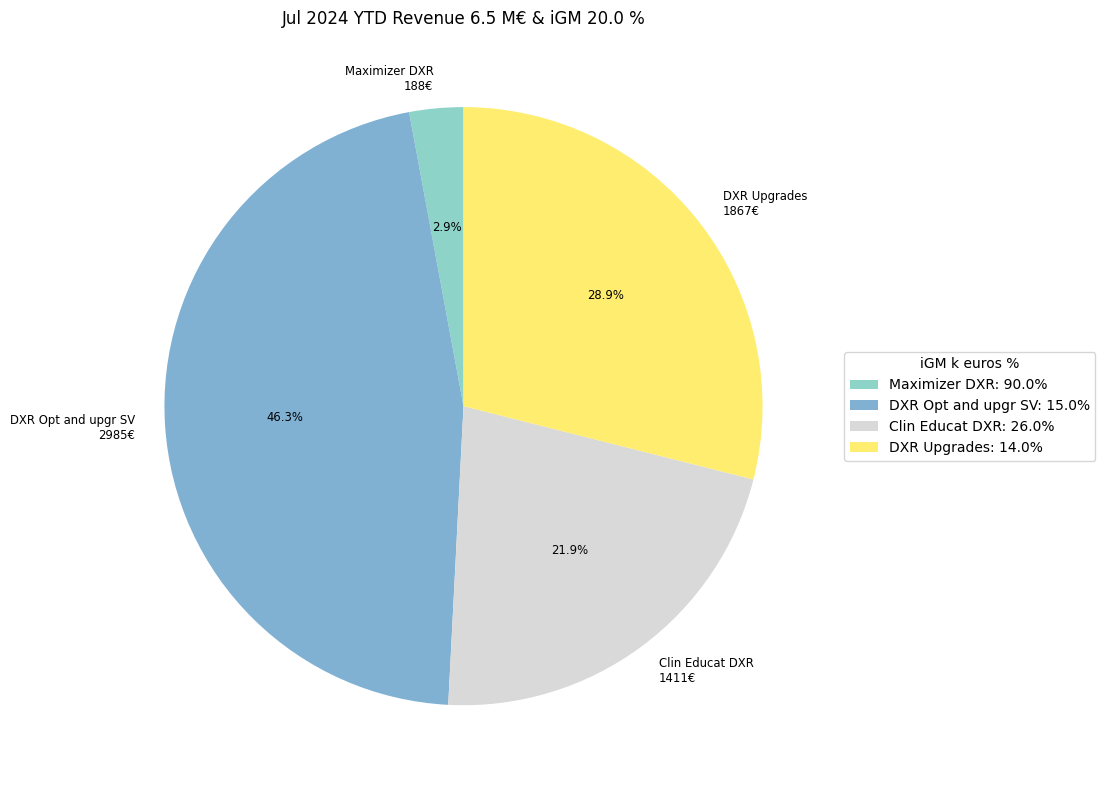

In [13]:
# Filter the rows to exclude "Tech Educat DXR", "DXR Prof Services", and the 'Total' row
filtered_revenue = july_revenue.loc[july_revenue.index != 'Total']  # Exclude the total row
filtered_revenue = filtered_revenue[~filtered_revenue['MAG Description'].isin(['Tech Educat DXR', 'DXR Prof Services'])]

# Labels for the pie chart, showing MAG Description and Achieved in Euros
labels = [f"{desc}\n{achieved}€" for desc, achieved in zip(filtered_revenue['MAG Description'], filtered_revenue['Achieved in Euros'])]

# Create the pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(filtered_revenue['Achieved in Euros'], 
                                   labels=labels, 
                                   autopct='%1.1f%%', 
                                   startangle=90, 
                                   textprops={'size': 'small'}, 
                                   colors=plt.cm.Set3(np.linspace(0, 1, len(filtered_revenue['MAG Description']))))

plt.title(f'Jul 2024 YTD Revenue 6.5 M€ & iGM {july_weighted_igm_k_euros_per} %')

# Add a legend showing iGM k euros %
legend_labels = [f"{desc}: {igm}%" for desc, igm in zip(filtered_revenue['MAG Description'], filtered_revenue['iGM k euros %'])]
plt.legend(wedges, legend_labels, title="iGM k euros %", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('charts/Jul_2024_YTD_Revenue', bbox_inches='tight')
plt.show()


August

In [14]:
august_sales2024 = dxr_clv_bussiness('Data\CLV-IB Report - All Markets - Aug 2024 - Final.xlsb','CLV-IB Sales Tables', 'August Sales')
august_sales2024

,1,2,3,4,5,6,7,8,9,10,11,12,13
August Sales,DXR,BA8,Maximizer DXR,0.120337,0.068592,3.204782,2.080502,0.0,0.0,1.819381,0.991332,0.0,0.223118
August Sales,DXR,BA9,Tech Educat DXR,0.052032,0.029658,0.013723,0.008289,0.0,0.0,-0.000446,0.011071,0.0,0.019649
August Sales,DXR,Q71,DXR Opt and upgr SV,4.812546,2.743151,2.167506,0.932347,0.0,0.0,0.988299,1.783432,0.0,3.341473
August Sales,DXR,V24,Clin Educat DXR,1.776225,1.012448,1.595346,0.995830,0.0,0.0,1.159887,1.269747,0.0,1.533844
August Sales,DXR,X19,DXR Upgrades,3.631639,2.070034,4.936179,2.999202,0.0,0.0,1.204217,2.289979,0.0,2.091676
August Sales,DXR,CF4,DXR Prof Services,0.066885,0.038125,0.005459,0.004480,0.0,0.0,0.000153,0.017273,0.0,0.013042


In [15]:
august_igm2024 = dxr_clv_bussiness('Data\CLV-IB Report - All Markets - Aug 2024 - Final.xlsb','CLV-IB IGM Tables', 'August IGM')
august_igm2024

,1,2,3,4,5,6,7,8,9,10,11,12,13
August IGM,DXR,BA8,Maximizer DXR,0.109466,0.062396,2.972420,1.932324,0.0,-4.762036,-15.416283,0.0,0.196566,0.134171
August IGM,DXR,BA9,Tech Educat DXR,0.037401,0.021318,0.000000,0.000000,0.0,-0.105730,-0.054684,0.0,-0.006309,-0.027628
August IGM,DXR,Q71,DXR Opt and upgr SV,1.450058,0.826533,-0.124725,-0.442172,0.0,-0.530753,-0.135668,0.0,0.658152,-0.168381
August IGM,DXR,V24,Clin Educat DXR,0.847424,0.483032,-1.618213,-1.231786,0.0,-0.616125,-0.533984,0.0,0.415386,-0.067646
August IGM,DXR,X19,DXR Upgrades,0.798029,0.454877,2.077835,1.173489,0.0,-0.076872,0.291255,0.0,0.367544,-0.087333
August IGM,DXR,CF4,DXR Prof Services,0.028449,0.016216,0.003016,0.003016,0.0,-0.096766,-0.032857,0.0,0.008184,-0.008032


In [16]:
data = []

column_names = [ "MAG Description", "Achieved in Euros", "iGM (M €)", "iGM k euros %"]
index_names = ['BA8', 'BA9', 'Q71', 'V24', 'X19','CF4']
august_revenue= pd.DataFrame(data, index=index_names,columns=column_names)

In [17]:
august_revenue.loc['BA8','MAG Description'] = august_sales2024.iloc[0,2]
august_revenue.loc['BA9','MAG Description'] = august_sales2024.iloc[1,2]
august_revenue.loc['Q71','MAG Description'] = august_sales2024.iloc[2,2]
august_revenue.loc['V24','MAG Description'] = august_sales2024.iloc[3,2]
august_revenue.loc['X19','MAG Description'] = august_sales2024.iloc[4,2]
august_revenue.loc['CF4','MAG Description'] = august_sales2024.iloc[5,2]

august_revenue.loc['BA8','Achieved in Euros'] = (((august_sales2024.iloc[0,12])*1000).round()).astype(int)
august_revenue.loc['BA9','Achieved in Euros'] = (((august_sales2024.iloc[1,12])*1000).round()).astype(int)
august_revenue.loc['Q71','Achieved in Euros'] = (((august_sales2024.iloc[2,12])*1000).round()).astype(int)
august_revenue.loc['V24','Achieved in Euros'] = (((august_sales2024.iloc[3,12])*1000).round()).astype(int)
august_revenue.loc['X19','Achieved in Euros'] = (((august_sales2024.iloc[4,12])*1000).round()).astype(int)
august_revenue.loc['CF4','Achieved in Euros'] = (((august_sales2024.iloc[5,12])*1000).round()).astype(int)

august_revenue.loc['BA8','iGM (M €)'] = (((august_igm2024.iloc[0,11])*1000).round()).astype(int)
august_revenue.loc['BA9','iGM (M €)'] = (((august_igm2024.iloc[1,11])*1000).round()).astype(int)
august_revenue.loc['Q71','iGM (M €)'] = (((august_igm2024.iloc[2,11])*1000).round()).astype(int)
august_revenue.loc['V24','iGM (M €)'] = (((august_igm2024.iloc[3,11])*1000).round()).astype(int)
august_revenue.loc['X19','iGM (M €)'] = (((august_igm2024.iloc[4,11])*1000).round()).astype(int)
august_revenue.loc['CF4','iGM (M €)'] = (((august_igm2024.iloc[5,11])*1000).round()).astype(int)

igm_k_euros_per = (august_revenue['iGM (M €)'] / august_revenue['Achieved in Euros']) * 100
august_revenue['iGM k euros %'] = (igm_k_euros_per.round()).astype(int)



In [18]:
august_revenue

,MAG Description,Achieved in Euros,iGM (M €),iGM k euros %
BA8,Maximizer DXR,223,197,88
BA9,Tech Educat DXR,20,-6,-30
Q71,DXR Opt and upgr SV,3341,658,19
V24,Clin Educat DXR,1534,415,27
X19,DXR Upgrades,2092,368,17
CF4,DXR Prof Services,13,8,61


In [19]:
# df = august_revenue

# Calculate total for 'Achieved in Euros' and 'iGM (M €)'
total_achieved_euros = august_revenue['Achieved in Euros'].sum()
total_igm = august_revenue['iGM (M €)'].sum()

# Calculate the weighted average for 'iGM k euros %'
weighted_igm_k_euros_per = (total_igm / total_achieved_euros) * 100
weighted_igm_k_euros_per = round(weighted_igm_k_euros_per, 1)

# Create a DataFrame for the total row
total_row = pd.DataFrame([['Total', total_achieved_euros, total_igm, weighted_igm_k_euros_per]], columns=august_revenue.columns)

# Concatenate the total row to the DataFrame
august_revenue_total = pd.concat([august_revenue, total_row], ignore_index=True)



In [20]:
august_revenue_total.to_csv('August_2024_revenue.csv')

august_revenue_total

,MAG Description,Achieved in Euros,iGM (M €),iGM k euros %
0,Maximizer DXR,223,197,88.0
1,Tech Educat DXR,20,-6,-30.0
2,DXR Opt and upgr SV,3341,658,19.0
3,Clin Educat DXR,1534,415,27.0
4,DXR Upgrades,2092,368,17.0
5,DXR Prof Services,13,8,61.0
6,Total,7223,1640,22.7


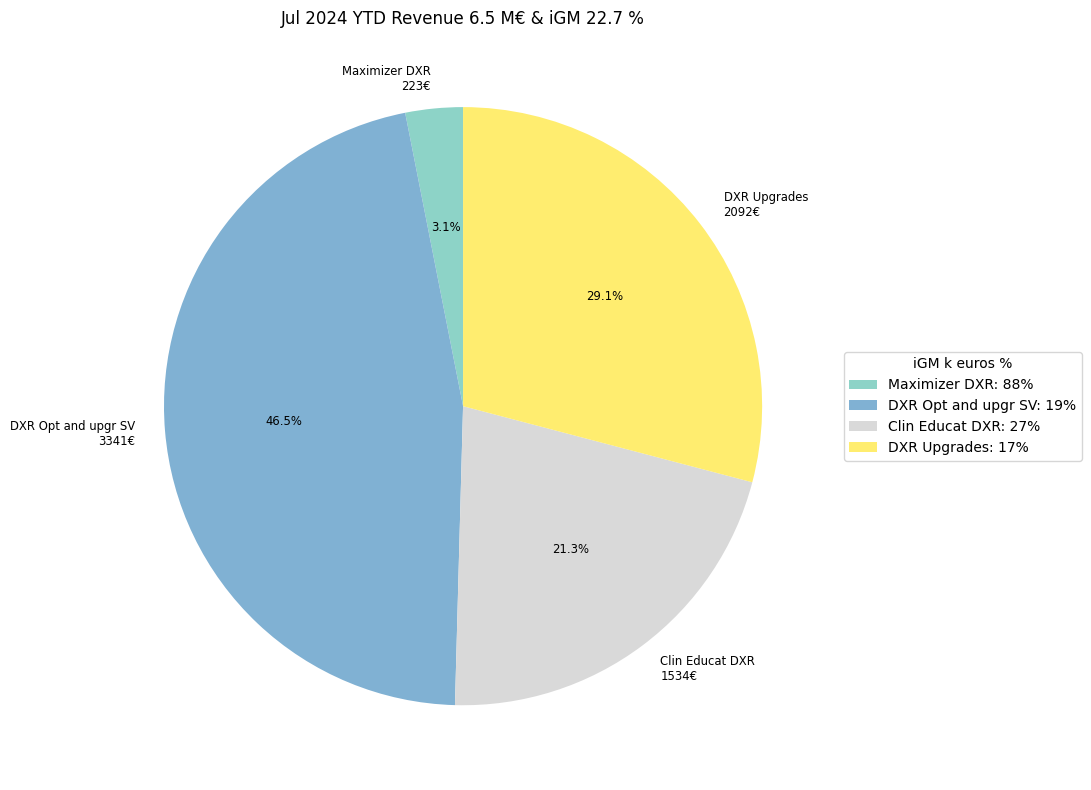

In [21]:
# Filter the rows to exclude "Tech Educat DXR", "DXR Prof Services", and the 'Total' row
filtered_revenue = august_revenue.loc[august_revenue.index != 'Total']  # Exclude the total row
filtered_revenue = filtered_revenue[~filtered_revenue['MAG Description'].isin(['Tech Educat DXR', 'DXR Prof Services'])]

# Labels for the pie chart, showing MAG Description and Achieved in Euros
labels = [f"{desc}\n{achieved}€" for desc, achieved in zip(filtered_revenue['MAG Description'], filtered_revenue['Achieved in Euros'])]

# Create the pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(filtered_revenue['Achieved in Euros'], 
                                   labels=labels, 
                                   autopct='%1.1f%%', 
                                   startangle=90, 
                                   textprops={'size': 'small'}, 
                                   colors=plt.cm.Set3(np.linspace(0, 1, len(filtered_revenue['MAG Description']))))

plt.title(f'Jul 2024 YTD Revenue 6.5 M€ & iGM {weighted_igm_k_euros_per} %')

# Add a legend showing iGM k euros %
legend_labels = [f"{desc}: {igm}%" for desc, igm in zip(filtered_revenue['MAG Description'], filtered_revenue['iGM k euros %'])]
plt.legend(wedges, legend_labels, title="iGM k euros %", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('charts/Jul_2024_YTD_Revenue', bbox_inches='tight')
plt.show()


September

In [22]:
 # for extracting month names from filenames

data_path = 'Data/'

# Load all Excel files and store them in a dictionary
def load_excel(folder):
    files = [f for f in os.listdir(folder) if f.endswith('.xlsx') or f.endswith('.xlsb')]
    data_dict = {}

    for file in files:
        file_path = os.path.join(folder, file)
        
        # Extract the month from the filename (assuming format "CLV-IB Report - All Markets - Jan 2024 - Final.xlsb")
        match = re.search(r'-\s*(\w+)\s*\d{4}', file)
        if match:
            month_name = match.group(1).strip()
        else:
            # If the month can't be extracted, you can skip the file or handle it differently
            print(f"Skipping file {file} as month name could not be extracted.")
            continue
        
        # Load the file depending on the format
        if file.endswith('.xlsx'):
            df = pd.read_excel(file_path)
        elif file.endswith('.xlsb'):
            with open_workbook(file_path) as wb:
                with wb.get_sheet(1) as sheet:
                    data = [[item.v for item in row] for row in sheet.rows()]
                # Create DataFrame from the data
                df = pd.DataFrame(data[1:], columns=data[0])  # assuming first row contains column names

        # Store the dataframe in a dictionary with the month name as the key
        data_dict[month_name] = df

    return data_dict

# Example of usage
data_dict = load_excel(data_path)

# Now you can access each month's data as data_dict['Jan'], data_dict['Feb'], etc.
print(data_dict.keys())  # This will print the available months


Skipping file CLV Market Dashboard_August 2024_YTD.xlsx as month name could not be extracted.
Skipping file DXR CLV Program Management_August.xlsb as month name could not be extracted.
dict_keys(['Apr', 'Aug', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Sep'])


In [23]:

# Function to extract the relevant DXR business data
def dxr_clv_bussiness(file_path, sheet_no, month):
    data_rows = []
    with open_workbook(file_path) as wb:
        with wb.get_sheet(sheet_no) as sheet:
            for row in sheet.rows():
                row = row[1:14]
                for item in row:
                    if item.v == "DXR":
                        data_rows.append([item.v for item in row])
                        break
    if data_rows:
        df = pd.DataFrame(data_rows)
        df.columns = list(range(1, df.shape[1] + 1))
        df.index = [month] * len(df)
        return df
    else:
        return pd.DataFrame()


# Automated report generation for each month
def generate_revenue_report(file_name, sheet_sales, sheet_igm, month, output_folder):
    # Load sales and IGM data for the month
    sales_df = dxr_clv_bussiness(file_name, sheet_sales, month)
    igm_df = dxr_clv_bussiness(file_name, sheet_igm, month)
    
    # Prepare DataFrame structure for the summary report
    column_names = ["MAG Description", "Achieved in Euros", "iGM (M €)", "iGM k euros %"]
    index_names = ['BA8', 'BA9', 'Q71', 'V24', 'X19', 'CF4']
    revenue_df = pd.DataFrame(index=index_names, columns=column_names)
    
    # Populate the DataFrame
    for i, index in enumerate(index_names):
        revenue_df.loc[index, 'MAG Description'] = sales_df.iloc[i, 2]
        revenue_df.loc[index, 'Achieved in Euros'] = ((sales_df.iloc[i, 12]) * 1000).round().astype(int)
        revenue_df.loc[index, 'iGM (M €)'] = (igm_df.iloc[i, 11] * 1000).round()
    
    # Calculate iGM percentage with division by zero and infinity handling
    revenue_df['iGM k euros %'] = np.where(
        revenue_df['Achieved in Euros'] != 0,  # Only calculate percentage where denominator is non-zero
        ((revenue_df['iGM (M €)'] / revenue_df['Achieved in Euros']) * 100).replace([np.inf, -np.inf], np.nan).round().astype(float),  # Handle inf and NaN
        np.nan  # Set to NaN if Achieved in Euros is 0
    )
    
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Save to CSV in the "Months Revenue" folder
    file_name_out = os.path.join(output_folder, f"{month}_2024_revenue.csv")
    revenue_df.to_csv(file_name_out)
    print(f"Report generated for {month}: {file_name_out}")
    
    return revenue_df

# Function to dynamically process all files in a folder
def process_all_months(folder_path):
    files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx') or f.endswith('.xlsb')]
    
    # Regex to extract the month name from file name
    output_folder = 'Months Revenue'  
    for file in files:
        match = re.search(r'-\s*(\w+)\s*\d{4}', file)
        if match:
            month_name = match.group(1).strip()
            file_path = os.path.join(folder_path, file)
            
            # Process each month’s file and save the report in the output folder
            revenue_report = generate_revenue_report(
                file_name=file_path, 
                sheet_sales='CLV-IB Sales Tables', 
                sheet_igm='CLV-IB IGM Tables', 
                month=month_name,
                output_folder=output_folder
            )
            print(f"Processed {month_name}")

# Set your folder path
data_folder = 'Data/'
process_all_months(data_folder)


Report generated for Apr: Months Revenue\Apr_2024_revenue.csv
Processed Apr
Report generated for Aug: Months Revenue\Aug_2024_revenue.csv
Processed Aug


C:\Users\320267200\AppData\Local\Temp\ipykernel_22524\3902342534.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ((revenue_df['iGM (M €)'] / revenue_df['Achieved in Euros']) * 100).replace([np.inf, -np.inf], np.nan).round().astype(float),  # Handle inf and NaN
C:\Users\320267200\AppData\Local\Temp\ipykernel_22524\3902342534.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ((revenue_df['iGM (M €)'] / revenue_df['Achieved in Euros']) * 100).replace([np.inf, -np.inf], np.nan).round().astype(float),  # Handle inf and NaN
C:\U

Report generated for Feb: Months Revenue\Feb_2024_revenue.csv
Processed Feb
Report generated for Jan: Months Revenue\Jan_2024_revenue.csv
Processed Jan
Report generated for July: Months Revenue\July_2024_revenue.csv
Processed July


C:\Users\320267200\AppData\Local\Temp\ipykernel_22524\3902342534.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ((revenue_df['iGM (M €)'] / revenue_df['Achieved in Euros']) * 100).replace([np.inf, -np.inf], np.nan).round().astype(float),  # Handle inf and NaN
C:\Users\320267200\AppData\Local\Temp\ipykernel_22524\3902342534.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ((revenue_df['iGM (M €)'] / revenue_df['Achieved in Euros']) * 100).replace([np.inf, -np.inf], np.nan).round().astype(float),  # Handle inf and NaN
C:\U

Report generated for June: Months Revenue\June_2024_revenue.csv
Processed June
Report generated for Mar: Months Revenue\Mar_2024_revenue.csv
Processed Mar
Report generated for May: Months Revenue\May_2024_revenue.csv
Processed May
Report generated for Sep: Months Revenue\Sep_2024_revenue.csv
Processed Sep


C:\Users\320267200\AppData\Local\Temp\ipykernel_22524\3902342534.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ((revenue_df['iGM (M €)'] / revenue_df['Achieved in Euros']) * 100).replace([np.inf, -np.inf], np.nan).round().astype(float),  # Handle inf and NaN
C:\Users\320267200\AppData\Local\Temp\ipykernel_22524\3902342534.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ((revenue_df['iGM (M €)'] / revenue_df['Achieved in Euros']) * 100).replace([np.inf, -np.inf], np.nan).round().astype(float),  # Handle inf and NaN
C:\U

In [24]:
sep_revenue = pd.read_csv("Months Revenue\Sep_2024_revenue.csv")
sep_revenue.set_index('Unnamed: 0', inplace=True)

In [25]:
sep_revenue

,MAG Description,Achieved in Euros,iGM (M €),iGM k euros %
Unnamed: 0,,,,
BA8,Maximizer DXR,278,365.0,131.0
BA9,Tech Educat DXR,21,-5.0,-24.0
Q71,DXR Opt and upgr SV,3577,784.0,22.0
V24,Clin Educat DXR,1747,636.0,36.0
X19,DXR Upgrades,2292,338.0,15.0
CF4,DXR Prof Services,13,8.0,62.0


In [26]:

# Calculate total for 'Achieved in Euros' and 'iGM (M €)'
total_achieved_euros = sep_revenue['Achieved in Euros'].sum()
total_achieved_euros_millions = total_achieved_euros / 1000

total_igm = sep_revenue['iGM (M €)'].sum()

# Calculate the weighted average for 'iGM k euros %'
weighted_igm_k_euros_per = (total_igm / total_achieved_euros) * 100
sep_weighted_igm_k_euros_per = round(weighted_igm_k_euros_per, 1)

# Create a DataFrame for the total row
total_row = pd.DataFrame([['Total', total_achieved_euros, total_igm, sep_weighted_igm_k_euros_per]], columns=sep_revenue.columns)

# Concatenate the total row to the DataFrame
sep_revenue_total = pd.concat([sep_revenue, total_row], ignore_index=True)



In [27]:
sep_revenue_total.to_csv("Months Revenue\Sep_2024_revenue_total.csv")

In [28]:
sep_revenue_total

,MAG Description,Achieved in Euros,iGM (M €),iGM k euros %
0,Maximizer DXR,278,365.0,131.0
1,Tech Educat DXR,21,-5.0,-24.0
2,DXR Opt and upgr SV,3577,784.0,22.0
3,Clin Educat DXR,1747,636.0,36.0
4,DXR Upgrades,2292,338.0,15.0
5,DXR Prof Services,13,8.0,62.0
6,Total,7928,2126.0,26.8


Function for creating pie charts

In [29]:
# Function to generate a dynamic pie chart for revenue and iGM %
def generate_revenue_pie_chart(revenue_df, month, year, total_revenue_millions, weighted_igm_k_euros_per, output_folder='charts'):
    # Filter out unwanted rows: 'Total', 'Tech Educat DXR', and 'DXR Prof Services'
    filtered_revenue = revenue_df[~revenue_df['MAG Description'].isin(['Total', 'Tech Educat DXR', 'DXR Prof Services'])]

    # Labels for the pie chart, showing MAG Description and Achieved in Euros
    labels = [f"{desc}\n{achieved}€" for desc, achieved in zip(filtered_revenue['MAG Description'], filtered_revenue['Achieved in Euros'])]

    # Create the pie chart
    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(
        filtered_revenue['Achieved in Euros'], 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=90, 
        textprops={'size': 13},  # Increase font size for labels
        colors=plt.cm.Set3(np.linspace(0, 1, len(filtered_revenue['MAG Description'])))
    )

    # Title dynamically using month, year, and total revenue (in M€) and weighted iGM %
    plt.title(f'{month} {year} YTD Revenue {total_revenue_millions:.1f} M€ & iGM {weighted_igm_k_euros_per} %', fontsize=17)

    # Add a legend showing iGM k euros %
    legend_labels = [f"{desc}: {igm}%" for desc, igm in zip(filtered_revenue['MAG Description'], filtered_revenue['iGM k euros %'])]
    plt.legend(wedges, legend_labels, title="iGM k euros %", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, title_fontsize=15)  # Increase font size for legend

    # Save the chart dynamically based on the month and year
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    chart_file_name = os.path.join(output_folder, f'{month}_{year}_YTD_Revenue.png')
    plt.tight_layout()
    plt.savefig(chart_file_name, bbox_inches='tight')
    plt.show()

    print(f"Pie chart saved as {chart_file_name}")


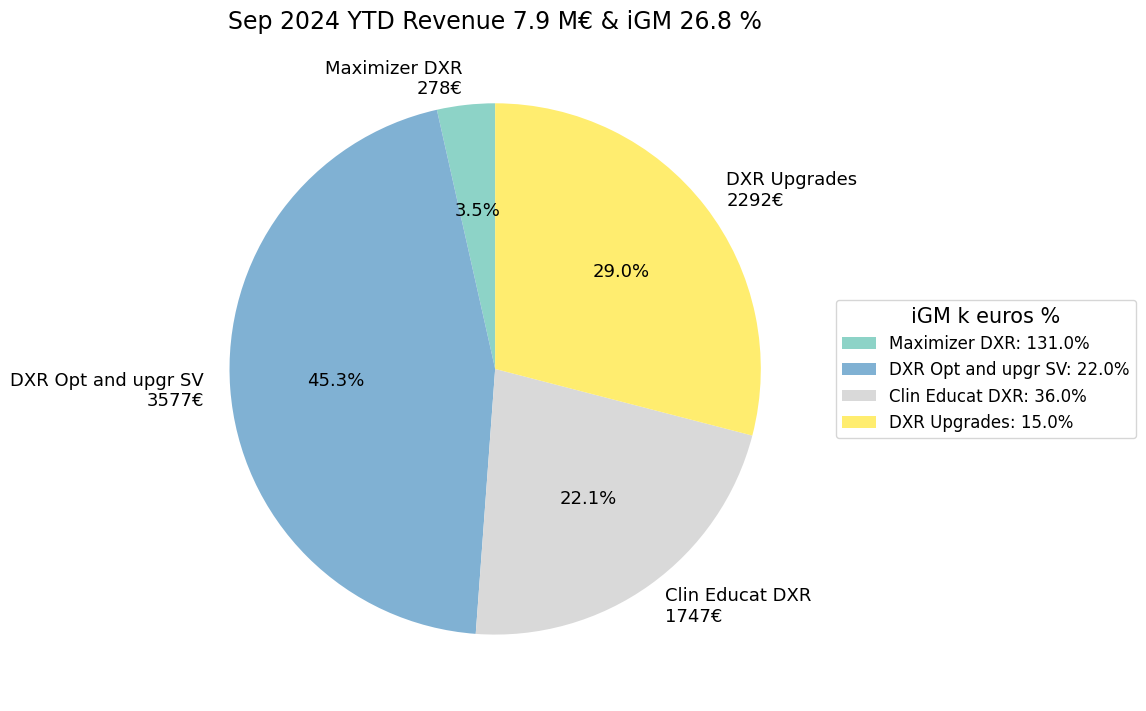

Pie chart saved as charts\Sep_2024_YTD_Revenue.png


In [30]:
# Assuming july_revenue is the DataFrame for July and you have calculated total_revenue and total_igm:
# generate_revenue_pie_chart(july_revenue, 'Jul', 2024, total_revenue=6.5, total_igm=20)

generate_revenue_pie_chart(sep_revenue_total, 'Sep', 2024, weighted_igm_k_euros_per=sep_weighted_igm_k_euros_per, total_revenue_millions=total_achieved_euros_millions)


Slide 3

In [31]:
january_df = pd.read_excel('Data\CLV-IB Report - All Markets - Jan 2024 - Final.xlsb', engine='pyxlsb', sheet_name=None)
print(january_df.keys())


dict_keys(['CLV-IB Sales Tables', 'CLV-IB OIT Tables', 'list', 'CLV-IB IGM Tables', 'CLV Overview', 'Data', 'Cube', 'Graph (Market)', 'Graph (Business)', 'IB Overview', 'Report per Mkt', 'Report per Product', 'Report per BM', 'Report per Market Progress'])


In [32]:
def load_dxr_total(file_path, sheet_no, month):
    data_rows = []
    with open_workbook(file_path) as wb:
        with wb.get_sheet(sheet_no) as sheet:
            for row in sheet.rows():
                row = row[1:14]
                
                for item in row:
                    if item.v == "DXR Total":
                        data_rows.append([item.v for item in row])
                        break
    if data_rows:
        df = pd.DataFrame(data_rows)
        df.columns = list(range(1, df.shape[1] + 1))
        df.index = [month] * len(df)
        return df
    else:
        return pd.DataFrame()

Sales

In [33]:
jan_Sales = load_dxr_total('Data\CLV-IB Report - All Markets - Jan 2024 - Final.xlsb', 'CLV-IB Sales Tables', 'January Sales')
feb_Sales = load_dxr_total('Data\CLV-IB Report - All Markets - Feb 2024 - Final.xlsb','CLV-IB Sales Tables', 'February Sales')
march_Sales = load_dxr_total('Data\CLV-IB Report - All Markets - Mar 2024 - Final.xlsb','CLV-IB Sales Tables', 'March Sales')
april_Sales = load_dxr_total('Data\CLV-IB Report - All Markets - Apr 2024 - Final.xlsb','CLV-IB Sales Tables',  'April Sales')
may_Sales = load_dxr_total('Data\CLV-IB Report - All Markets - May 2024 - Final.xlsb','CLV-IB Sales Tables', 'May Sales')
june_Sales = load_dxr_total('Data\CLV-IB Report - All Markets - June 2024 - Final.xlsb','CLV-IB Sales Tables', 'June Sales')
july_Sales = load_dxr_total('Data\CLV-IB Report - All Markets - July 2024 - Final.xlsb','CLV-IB Sales Tables', 'July Sales')
aug_Sales = load_dxr_total('Data\CLV-IB Report - All Markets - Aug 2024 - Final.xlsb','CLV-IB Sales Tables', 'August Sales')
sep_Sales = load_dxr_total('Data\CLV-IB Report - All Markets - Sep 2024 - Final.xlsb','CLV-IB Sales Tables', 'September Sales')

IGM

In [34]:

jan_IGM = load_dxr_total('Data\CLV-IB Report - All Markets - Jan 2024 - Final.xlsb', 'CLV-IB IGM Tables', 'January IGM')
feb_IGM = load_dxr_total('Data\CLV-IB Report - All Markets - Feb 2024 - Final.xlsb', 'CLV-IB IGM Tables', 'February  IGM')
march_IGM = load_dxr_total('Data\CLV-IB Report - All Markets - Mar 2024 - Final.xlsb', 'CLV-IB IGM Tables', 'March  IGM')
april_IGM = load_dxr_total('Data\CLV-IB Report - All Markets - Apr 2024 - Final.xlsb', 'CLV-IB IGM Tables',  'April  IGM')
may_IGM = load_dxr_total('Data\CLV-IB Report - All Markets - May 2024 - Final.xlsb', 'CLV-IB IGM Tables', 'May  IGM')
june_IGM = load_dxr_total('Data\CLV-IB Report - All Markets - June 2024 - Final.xlsb', 'CLV-IB IGM Tables', 'June  IGM')
july_IGM = load_dxr_total('Data\CLV-IB Report - All Markets - July 2024 - Final.xlsb', 'CLV-IB IGM Tables', 'July  IGM')
aug_IGM = load_dxr_total('Data\CLV-IB Report - All Markets - Aug 2024 - Final.xlsb', 'CLV-IB IGM Tables', 'August  IGM')
sep_IGM = load_dxr_total('Data\CLV-IB Report - All Markets - Sep 2024 - Final.xlsb','CLV-IB IGM Tables',  'September IGM')



In [35]:
sales_months_df = pd.concat([jan_Sales, feb_Sales, march_Sales, april_Sales, may_Sales, june_Sales, july_Sales, aug_Sales, sep_Sales])
sales_months_df = sales_months_df.drop([1,2,3], axis=1)
sales_months_df

,4,5,6,7,8,9,10,11,12,13
January Sales,10.459664,0.641297,10.669124,0.643750,4.108639,0.290938,0.000000,0.000000,0.000000,1.005143
February Sales,10.459664,1.255160,11.807200,1.343777,0.000000,0.000000,0.000000,0.000000,0.000000,1.761108
March Sales,10.459664,2.091933,11.922995,2.136162,0.000000,0.000000,3.134615,0.000000,0.000000,2.918746
April Sales,10.459664,2.876408,11.922995,2.836711,0.000000,0.000000,3.635675,0.000000,0.000000,3.669725
May Sales,10.459664,3.660882,11.922995,3.726604,0.000000,0.000000,3.730675,0.000000,0.000000,4.368424
June Sales,10.459664,4.706849,11.922995,5.356394,0.000000,0.000000,4.334654,5.141970,0.000000,5.305512
July Sales,10.459664,5.334429,11.922995,6.229065,0.000000,0.000000,4.757072,5.686939,0.000000,6.482086
August Sales,10.459664,5.962008,11.922995,7.020650,0.000000,0.000000,5.171491,6.362833,0.000000,7.222802
September Sales,10.459664,6.798782,11.922995,8.850777,0.000000,0.000000,5.913315,7.094705,8.051919,7.927695


In [36]:
igm_months_df = pd.concat([jan_IGM, feb_IGM, march_IGM, april_IGM, may_IGM, june_IGM, july_IGM, aug_IGM, sep_IGM])
igm_months_df = igm_months_df.drop([1,2,3], axis=1)
igm_months_df

,4,5,6,7,8,9,10,11,12,13
January IGM,3.270827,0.221833,-12.407639,-1.433828,0.0,0.000000,0.000000,0.000000,0.126872,-0.094962
February IGM,3.270827,0.392499,3.187586,0.165612,0.0,0.000000,0.000000,0.000000,0.094039,-0.298460
March IGM,3.270827,0.654165,3.310333,0.296601,0.0,-0.454053,0.000000,0.000000,0.073916,-0.580250
April IGM,3.270827,0.899477,3.310333,0.441989,0.0,-1.589688,0.000000,0.000000,0.096925,-0.802552
May IGM,3.270827,1.144790,3.310333,0.659653,0.0,-3.022167,0.000000,0.000000,0.056813,-1.087976
June IGM,3.270827,1.471872,3.310333,1.063471,0.0,-3.792601,-4.994123,0.000000,0.800447,-0.671425
July IGM,3.270827,1.668122,3.310333,1.307016,0.0,-4.999994,-10.723907,0.000000,1.291716,-0.376406
August IGM,3.270827,1.864372,3.310333,1.434871,0.0,-6.188281,-15.882222,0.000000,1.639522,-0.224849
September IGM,3.270827,2.126038,3.310333,2.122730,0.0,-6.928202,-21.123652,1.625561,2.125404,-0.000633


In [37]:
data = []

column_names = ["Sales YTD", "Sales CY", "IGM YTD", "IGM CY"]
index_name = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep"]
df = pd.DataFrame(data, index=index_name, columns=column_names)


In [38]:
df.loc['Jan', 'Sales YTD'] = sales_months_df.loc['January Sales',9]
df.loc['Jan', 'Sales CY'] = sales_months_df.loc['January Sales',13]
df.loc['Jan', 'IGM YTD'] = igm_months_df.loc['January IGM',7]
df.loc['Jan', 'IGM CY'] = igm_months_df.loc['January IGM',12]

df.loc['Feb', 'Sales YTD'] = sales_months_df.loc['February Sales',7]
df.loc['Feb', 'Sales CY'] = sales_months_df.loc['February Sales',13]
df.loc['Feb', 'IGM YTD'] = igm_months_df.loc['February  IGM',7]
df.loc['Feb', 'IGM CY'] = igm_months_df.loc['February  IGM',12]

df.loc['Mar', 'Sales YTD'] = sales_months_df.loc['March Sales',7]
df.loc['Mar', 'Sales CY'] = sales_months_df.loc['March Sales',13]
df.loc['Mar', 'IGM YTD'] = igm_months_df.loc['March  IGM',7]
df.loc['Mar', 'IGM CY'] = igm_months_df.loc['March  IGM',12]

df.loc['Apr', 'Sales YTD'] = sales_months_df.loc['April Sales',7]
df.loc['Apr', 'Sales CY'] = sales_months_df.loc['April Sales',13]
df.loc['Apr', 'IGM YTD'] = igm_months_df.loc['April  IGM',7]
df.loc['Apr', 'IGM CY'] = igm_months_df.loc['April  IGM',12]

df.loc['May', 'Sales YTD'] = sales_months_df.loc['May Sales',7]
df.loc['May', 'Sales CY'] = sales_months_df.loc['May Sales',13]
df.loc['May', 'IGM YTD'] = igm_months_df.loc['May  IGM',7]
df.loc['May', 'IGM CY'] = igm_months_df.loc['May  IGM',12]

df.loc['Jun', 'Sales YTD'] = sales_months_df.loc['June Sales',7]
df.loc['Jun', 'Sales CY'] = sales_months_df.loc['June Sales',13]
df.loc['Jun', 'IGM YTD'] = igm_months_df.loc['June  IGM',7]
df.loc['Jun', 'IGM CY'] = igm_months_df.loc['June  IGM',12]

df.loc['Jul', 'Sales YTD'] = sales_months_df.loc['July Sales',7]
df.loc['Jul', 'Sales CY'] = sales_months_df.loc['July Sales',13]
df.loc['Jul', 'IGM YTD'] = igm_months_df.loc['July  IGM',7]
df.loc['Jul', 'IGM CY'] = igm_months_df.loc['July  IGM',12]

df.loc['Aug', 'Sales YTD'] = sales_months_df.loc['August Sales',7]
df.loc['Aug', 'Sales CY'] = sales_months_df.loc['August Sales',13]
df.loc['Aug', 'IGM YTD'] = igm_months_df.loc['August  IGM',7]
df.loc['Aug', 'IGM CY'] = igm_months_df.loc['August  IGM',12]


df.loc['Sep', 'Sales YTD'] = sales_months_df.loc['September Sales',7]
df.loc['Sep', 'Sales CY'] = sales_months_df.loc['September Sales',13]
df.loc['Sep', 'IGM YTD'] = igm_months_df.loc['September IGM',7]
df.loc['Sep', 'IGM CY'] = igm_months_df.loc['September IGM',12]

In [39]:
df

,Sales YTD,Sales CY,IGM YTD,IGM CY
Jan,0.290938,1.005143,-1.433828,0.126872
Feb,1.343777,1.761108,0.165612,0.094039
Mar,2.136162,2.918746,0.296601,0.073916
Apr,2.836711,3.669725,0.441989,0.096925
May,3.726604,4.368424,0.659653,0.056813
Jun,5.356394,5.305512,1.063471,0.800447
Jul,6.229065,6.482086,1.307016,1.291716
Aug,7.02065,7.222802,1.434871,1.639522
Sep,8.850777,7.927695,2.12273,2.125404


In [40]:
df.to_csv('months_data.csv')


In [41]:
months_data = pd.read_csv("months_data.csv",index_col=0)
months_data

,Sales YTD,Sales CY,IGM YTD,IGM CY
Jan,0.290938,1.005143,-1.433828,0.126872
Feb,1.343777,1.761108,0.165612,0.094039
Mar,2.136162,2.918746,0.296601,0.073916
Apr,2.836711,3.669725,0.441989,0.096925
May,3.726604,4.368424,0.659653,0.056813
Jun,5.356394,5.305512,1.063471,0.800447
Jul,6.229065,6.482086,1.307016,1.291716
Aug,7.020650,7.222802,1.434871,1.639522
Sep,8.850777,7.927695,2.122730,2.125404


In [42]:
column_names = ["Target 2024 YTD Sales", "Actual 2024 YTD Sales","Target iGM %","IGM","ITM iGM (k€)" ,"ITM iGM %", "YTD iGM %"]
index_name = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep"]


ITM_vs_YTD_df = pd.DataFrame(index=index_name, columns=column_names)



In [43]:
ITM_vs_YTD_df

,Target 2024 YTD Sales,Actual 2024 YTD Sales,Target iGM %,IGM,ITM iGM (k€),ITM iGM %,YTD iGM %
Jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Feb,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apr,NaN,NaN,NaN,NaN,NaN,NaN,NaN
May,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jun,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jul,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aug,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sep,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Multiplying "Sales YTD" by 1000 and rounding off

#Target 2024 YTD
ITM_vs_YTD_df['Target 2024 YTD Sales'] = (months_data['Sales YTD'] * 1000).round() 
ITM_vs_YTD_df['Target 2024 YTD Sales'][1:] = ITM_vs_YTD_df['Target 2024 YTD Sales'][1:] - ITM_vs_YTD_df['Target 2024 YTD Sales'][:-1].values # Modifying "Target 2024 YTD" by subtracting the previous month's value from the current month's value, except for January

#Actual 2024 YTD sales
ITM_vs_YTD_df['Actual 2024 YTD Sales'] = (months_data['Sales CY'] * 1000).round()

#IGM
ITM_vs_YTD_df['IGM'] = (months_data['IGM CY'] * 1000).round()

ITM_vs_YTD_df['ITM iGM (k€)'] = ITM_vs_YTD_df['IGM']
ITM_vs_YTD_df['ITM iGM (k€)'][1:] = ITM_vs_YTD_df['IGM'][1:] - ITM_vs_YTD_df['IGM'][:-1].values

ITM_vs_YTD_df['Target iGM %'] = (months_data['Sales CY'] * 1000).round() 
ITM_vs_YTD_df['Target iGM %'][1:] = ITM_vs_YTD_df['Target iGM %'][1:] - ITM_vs_YTD_df['Target iGM %'][:-1].values

#ITM iGM%
ITM_iGM_per = (ITM_vs_YTD_df['ITM iGM (k€)'] / ITM_vs_YTD_df['Target iGM %']) * 100
ITM_vs_YTD_df['ITM iGM %'] =  (ITM_iGM_per.round()).astype(int)

#YTD iGM%
YTD_iGM_per = (ITM_vs_YTD_df['IGM'] / ITM_vs_YTD_df['Actual 2024 YTD Sales']) * 100
ITM_vs_YTD_df['YTD iGM %'] = YTD_iGM_per.round().astype(int)
ITM_vs_YTD_df

# ITM_vs_YTD_df['Target 2024 YTD Sales'] = (months_data['Sales YTD'] * 1000).round().astype(int) 
# ITM_vs_YTD_df['Target 2024 YTD Sales'][1:] = ITM_vs_YTD_df['Target 2024 YTD Sales'][1:].astype(int) - ITM_vs_YTD_df['Target 2024 YTD Sales'][:-1].values

C:\Users\320267200\AppData\Local\Temp\ipykernel_22524\1991989634.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ITM_vs_YTD_df['Target 2024 YTD Sales'][1:] = ITM_vs_YTD_df['Target 2024 YTD Sales'][1:] - ITM_vs_YTD_df['Target 2024 YTD Sal

,Target 2024 YTD Sales,Actual 2024 YTD Sales,Target iGM %,IGM,ITM iGM (k€),ITM iGM %,YTD iGM %
Jan,291.0,1005.0,1005.0,127.0,127.0,13,13
Feb,1053.0,1761.0,756.0,94.0,-33.0,-4,5
Mar,792.0,2919.0,1158.0,74.0,-20.0,-2,3
Apr,701.0,3670.0,751.0,97.0,23.0,3,3
May,890.0,4368.0,698.0,57.0,-40.0,-6,1
Jun,1629.0,5306.0,938.0,800.0,743.0,79,15
Jul,873.0,6482.0,1176.0,1292.0,492.0,42,20
Aug,792.0,7223.0,741.0,1640.0,348.0,47,23
Sep,1830.0,7928.0,705.0,2125.0,485.0,69,27


In [45]:
ITM_vs_YTD_df.to_csv('iGM_%_ITM_&_YTD.csv')

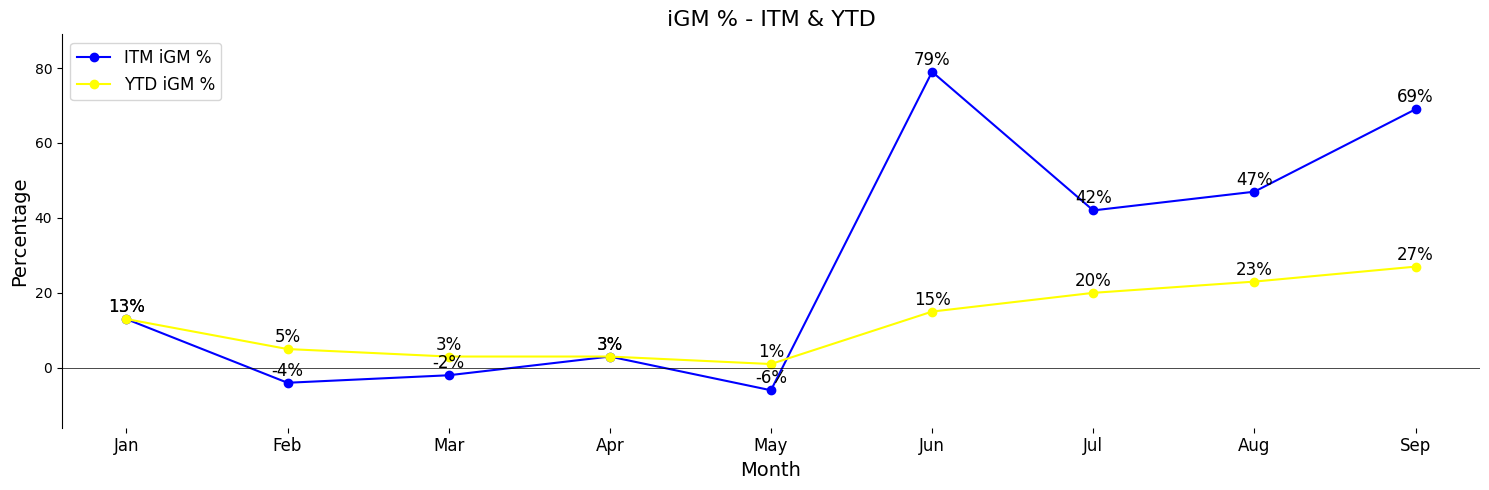

In [47]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plotting data
ax.plot(data.index, data['ITM iGM %'], label='ITM iGM %', color='blue', marker='o')
ax.plot(data.index, data['YTD iGM %'], label='YTD iGM %', color='yellow', marker='o')

# Set Y label and Title with increased font size
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('iGM % - ITM & YTD', fontsize=16)

# Set Y-axis limits dynamically
ax.set_ylim(min(data[['ITM iGM %', 'YTD iGM %']].min()) - 10, max(data[['ITM iGM %', 'YTD iGM %']].max()) + 10)

# Annotating the percentage values on the points
for i, txt in enumerate(data['ITM iGM %']):
    ax.annotate(f'{txt}%', (data.index[i], data['ITM iGM %'][i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=12)

for i, txt in enumerate(data['YTD iGM %']):
    ax.annotate(f'{txt}%', (data.index[i], data['YTD iGM %'][i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=12)

# Horizontal line at 0
ax.axhline(0, color='black', linewidth=0.5)

# Set X-ticks and X-tick labels with increased font size
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
ax.set_xticks(data.index)
ax.set_xticklabels(months, fontsize=12)

# Hide certain spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Set X-axis label 
ax.set_xlabel("Month", fontsize=14)

# Set the font size for the legend
ax.legend(fontsize=12)

# Adjust layout and save
plt.tight_layout()
plt.savefig('charts/iGM % - ITM & YTD_sep', bbox_inches='tight')
plt.show()


Slide 4

In [48]:
report_per_prod_23 = pd.read_excel('Data_23\CLV Market Dashboard Jul_23.xlsx', engine='openpyxl', sheet_name='Comparision')
report_per_prod_23


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.09137,0.109061,0.071732,0.051847,0.093292,0.081676,0.059366,0.144602,NaN,NaN
1,Region,Market,2022,ACT 2022 - July YTD,AOP 2023 - July YTD,ACT 2023 - July YTD,NaN,NaN,NaN,NaN,...,Mei,Jun,Jul,Aug,Sep,Okt,Nov,Dec,Total,CHK
2,NAM,NAM,5819.19904,3244.44737,2291,3226,NaN,NaN,NaN,NaN,...,417.4746,628.4664,628.45167,246.90397,690.57955,355.00797,344.30711,937.95307,5819.19904,5819.19904
3,GRC,GRC,891.04854,507.200211,239,22,NaN,NaN,NaN,NaN,...,81.415218,97.178664,63.917107,46.198042,83.12761,72.777531,52.89793,128.847216,891.04854,891.04854
4,WE,APA,282.05474,128.68172,250,135.96466,NaN,NaN,NaN,NaN,...,5.82998,27.17707,16.08067,36.8286,9.40496,6.04231,52.08078,49.01637,282.05474,282.05474
5,WE,CEE,51.20567,29.147151,84,40,NaN,NaN,NaN,NaN,...,4.678669,5.584543,3.673109,2.654852,4.777074,4.182289,3.039873,7.404432,51.20567,51.20567
6,Growth,RCA,0,0,0,13,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7,WE,BNL,621.8607,406.59216,355,190,NaN,NaN,NaN,NaN,...,41.39698,138.276,16.50954,74.04733,29.94422,27.34503,11.03394,72.89802,621.8607,621.8607
8,WE,DAC,1068.22239,535.91586,580,592,NaN,NaN,NaN,NaN,...,52.19494,65.62398,78.69925,72.81299,99.41026,72.46579,56.04407,231.57342,1068.22239,1068.22239
9,WE,FRA,203.9944,116.117134,117,168,NaN,NaN,NaN,NaN,...,18.638994,22.247838,14.633021,10.576463,19.031025,16.661504,12.110318,29.497956,203.9944,203.9944


In [49]:
report_per_prod_23 = report_per_prod_23.drop(report_per_prod_23.columns[6:26], axis=1)
report_per_prod_23

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Region,Market,2022,ACT 2022 - July YTD,AOP 2023 - July YTD,ACT 2023 - July YTD
2,NAM,NAM,5819.19904,3244.44737,2291,3226
3,GRC,GRC,891.04854,507.200211,239,22
4,WE,APA,282.05474,128.68172,250,135.96466
5,WE,CEE,51.20567,29.147151,84,40
6,Growth,RCA,0,0,0,13
7,WE,BNL,621.8607,406.59216,355,190
8,WE,DAC,1068.22239,535.91586,580,592
9,WE,FRA,203.9944,116.117134,117,168


In [50]:
report_per_prod_23 = report_per_prod_23.drop(report_per_prod_23.index[20:])
report_per_prod_23

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Region,Market,2022,ACT 2022 - July YTD,AOP 2023 - July YTD,ACT 2023 - July YTD
2,NAM,NAM,5819.19904,3244.44737,2291,3226
3,GRC,GRC,891.04854,507.200211,239,22
4,WE,APA,282.05474,128.68172,250,135.96466
5,WE,CEE,51.20567,29.147151,84,40
6,Growth,RCA,0,0,0,13
7,WE,BNL,621.8607,406.59216,355,190
8,WE,DAC,1068.22239,535.91586,580,592
9,WE,FRA,203.9944,116.117134,117,168


In [51]:
# report_per_prod_23.columns = report_per_prod_23.iloc[0]
report_per_prod_23.columns = report_per_prod_23.iloc[1]
report_per_prod_23


1,Region,Market,2022,ACT 2022 - July YTD,AOP 2023 - July YTD,ACT 2023 - July YTD
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Region,Market,2022,ACT 2022 - July YTD,AOP 2023 - July YTD,ACT 2023 - July YTD
2,NAM,NAM,5819.19904,3244.44737,2291,3226
3,GRC,GRC,891.04854,507.200211,239,22
4,WE,APA,282.05474,128.68172,250,135.96466
5,WE,CEE,51.20567,29.147151,84,40
6,Growth,RCA,0,0,0,13
7,WE,BNL,621.8607,406.59216,355,190
8,WE,DAC,1068.22239,535.91586,580,592
9,WE,FRA,203.9944,116.117134,117,168


In [52]:
report_per_prod_23.drop(index=18)

1,Region,Market,2022,ACT 2022 - July YTD,AOP 2023 - July YTD,ACT 2023 - July YTD
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Region,Market,2022,ACT 2022 - July YTD,AOP 2023 - July YTD,ACT 2023 - July YTD
2,NAM,NAM,5819.19904,3244.44737,2291,3226
3,GRC,GRC,891.04854,507.200211,239,22
4,WE,APA,282.05474,128.68172,250,135.96466
5,WE,CEE,51.20567,29.147151,84,40
6,Growth,RCA,0,0,0,13
7,WE,BNL,621.8607,406.59216,355,190
8,WE,DAC,1068.22239,535.91586,580,592
9,WE,FRA,203.9944,116.117134,117,168


In [53]:
df_cleaned = report_per_prod_23.drop(0)


In [54]:
df_cleaned

1,Region,Market,2022,ACT 2022 - July YTD,AOP 2023 - July YTD,ACT 2023 - July YTD
1,Region,Market,2022,ACT 2022 - July YTD,AOP 2023 - July YTD,ACT 2023 - July YTD
2,NAM,NAM,5819.19904,3244.44737,2291,3226
3,GRC,GRC,891.04854,507.200211,239,22
4,WE,APA,282.05474,128.68172,250,135.96466
5,WE,CEE,51.20567,29.147151,84,40
6,Growth,RCA,0,0,0,13
7,WE,BNL,621.8607,406.59216,355,190
8,WE,DAC,1068.22239,535.91586,580,592
9,WE,FRA,203.9944,116.117134,117,168
10,WE,IBE,28.71467,16.344886,85,3.05


In [55]:
df_cleaned_filt = df_cleaned.drop(1)

In [56]:
df_cleaned_filt

1,Region,Market,2022,ACT 2022 - July YTD,AOP 2023 - July YTD,ACT 2023 - July YTD
2,NAM,NAM,5819.19904,3244.44737,2291,3226
3,GRC,GRC,891.04854,507.200211,239,22
4,WE,APA,282.05474,128.68172,250,135.96466
5,WE,CEE,51.20567,29.147151,84,40
6,Growth,RCA,0,0,0,13
7,WE,BNL,621.8607,406.59216,355,190
8,WE,DAC,1068.22239,535.91586,580,592
9,WE,FRA,203.9944,116.117134,117,168
10,WE,IBE,28.71467,16.344886,85,3.05
11,WE,IIG,96.33076,54.833132,78,704


In [57]:
df_cleaned_filt.reset_index(drop=True, inplace=True)

In [58]:
df_cleaned_filt

1,Region,Market,2022,ACT 2022 - July YTD,AOP 2023 - July YTD,ACT 2023 - July YTD
0,NAM,NAM,5819.19904,3244.44737,2291,3226
1,GRC,GRC,891.04854,507.200211,239,22
2,WE,APA,282.05474,128.68172,250,135.96466
3,WE,CEE,51.20567,29.147151,84,40
4,Growth,RCA,0,0,0,13
5,WE,BNL,621.8607,406.59216,355,190
6,WE,DAC,1068.22239,535.91586,580,592
7,WE,FRA,203.9944,116.117134,117,168
8,WE,IBE,28.71467,16.344886,85,3.05
9,WE,IIG,96.33076,54.833132,78,704


In [59]:
df_cleaned_filt = df_cleaned_filt.drop(index=16)

In [60]:
# df_cleaned_filt = df_cleaned_filt.drop(index=16)

In [61]:
df_cleaned_filt

1,Region,Market,2022,ACT 2022 - July YTD,AOP 2023 - July YTD,ACT 2023 - July YTD
0,NAM,NAM,5819.19904,3244.44737,2291,3226
1,GRC,GRC,891.04854,507.200211,239,22
2,WE,APA,282.05474,128.68172,250,135.96466
3,WE,CEE,51.20567,29.147151,84,40
4,Growth,RCA,0,0,0,13
5,WE,BNL,621.8607,406.59216,355,190
6,WE,DAC,1068.22239,535.91586,580,592
7,WE,FRA,203.9944,116.117134,117,168
8,WE,IBE,28.71467,16.344886,85,3.05
9,WE,IIG,96.33076,54.833132,78,704


----------------------------------------------------------------------------------------------------------------------

In [62]:
# file_path =pd.read_excel('Data\CLV-IB Report - All Markets - July 2024 - Final.xlsb', engine='pyxlsb', sheet_name='Report per Product')


file_path = "Data\CLV-IB Report - All Markets - July 2024 - Final.xlsb" 


In [63]:
report_per_prod_24 = pd.read_excel(file_path, sheet_name='Report per Product', header=[4, 5], index_col=[0, 1])
report_per_prod_24



Column Labels            Column Labels                                        \
OIT                                OIT       OIT.1        OIT.2        OIT.3   
Row Labels    LY Actual            AOP   CY Actual   CY Act ITM         ∆ LY   
NAM          3288.320211        70.608  2270.28012    251.52405 -1018.040091   
GRC          174.125416            NaN     2.78939            0  -171.336026   
APA          232.867901     272.002349   379.52467     109.7401   146.656769   
CEE          24.655753         67.7531    35.47139      2.16479    10.815637   
RCA          0.862815                0         NaN          NaN    -0.862815   
BNL          131.735244     165.666667    208.1888       41.075    76.453556   
DAC          399.626188       421.6271   178.48954     59.64732  -221.136648   
FRA          74.892006         76.6291   -41.59934     50.47071  -116.491346   
IBE          300.507438        125.107    64.32096      14.5437  -236.186478   
IIG          348.288767       472.6081   111.11725       3.6248  -237.171517   
NOR          57.193525         71.0831   113.81816     108.8382    56.624635   
UKI          167.464171       320.3979   199.69598      22.7535    32.231809   
ISC         -4.051236                0     1.53307      -1.3331     5.584306   
JPN          45.928582               0     3.17018          NaN   -42.758402   
LAT          213.73238         283.374   114.19237      -11.979    -99.54001   
META         142.359778     227.943263   205.60199     -22.4808    63.242212   
Grand Total  5598.508939   2574.799678  3846.59453    628.58927 -1751.914409   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   
             5598.508939           NaN         NaN          NaN          NaN   


In [64]:
cy_actual = report_per_prod_24['Column Labels', 'Sales.2'].dropna()
cy_actual

Row Labels     LY Actual      CY Actual
NAM           3288.320211     4339.6538
GRC           174.125416       334.7094
APA           232.867901        231.679
CEE           24.655753         39.6297
RCA           0.862815           0.0267
BNL           131.735244       124.1802
DAC           399.626188       516.4072
FRA           74.892006        215.4168
IBE           300.507438        26.5446
IIG           348.288767       142.0557
NOR           57.193525          31.282
UKI           167.464171       186.1748
ISC          -4.051236          -0.2371
JPN           45.928582         16.3538
LAT           213.73238        154.9772
META          142.359778       123.2327
Grand Total   5598.508939     6482.0865
Name: (Column Labels, Sales.2), dtype: object

In [65]:
filtered_series = cy_actual.reset_index()
filtered_series

,level_0,level_1,Column Labels
,,,Sales.2
0,Row Labels,LY Actual,CY Actual
1,NAM,3288.320211,4339.6538
2,GRC,174.125416,334.7094
3,APA,232.867901,231.679
4,CEE,24.655753,39.6297
5,RCA,0.862815,0.0267
6,BNL,131.735244,124.1802
7,DAC,399.626188,516.4072
8,FRA,74.892006,215.4168


In [66]:
filtered_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   (level_0, )               18 non-null     object
 1   (level_1, )               18 non-null     object
 2   (Column Labels, Sales.2)  18 non-null     object
dtypes: object(3)
memory usage: 564.0+ bytes


In [67]:
filtered_series = filtered_series.drop(index=0)



In [68]:
data = []

column_names = ['Market','ACT 2022 - Jul YTD (k€)', 'ACT 2023 - Jul YTD (k€)', 'ACT 2024 - Jul YTD (k€)']
index_name = ['NAR','GRC','Growth','Growth','Growth','Growth','Growth','Growth','EU','EU','EU','EU','EU','EU','EU','EU','Grand Total']
performance_per_region = pd.DataFrame(data,index=index_name , columns=column_names)


In [69]:
filtered_series['Column Labels', 'Sales.2']=filtered_series['Column Labels', 'Sales.2'].map(round)
filtered_series

,level_0,level_1,Column Labels
,,,Sales.2
1,NAM,3288.320211,4340
2,GRC,174.125416,335
3,APA,232.867901,232
4,CEE,24.655753,40
5,RCA,0.862815,0
6,BNL,131.735244,124
7,DAC,399.626188,516
8,FRA,74.892006,215
9,IBE,300.507438,27


In [70]:
performance_per_region['ACT 2024 - Jul YTD (k€)'] = filtered_series['Column Labels', 'Sales.2'].values
performance_per_region['Market'] = filtered_series['level_0'].values

performance_per_region = performance_per_region.rename_axis('Region')
performance_per_region

# print(df)

,Market,ACT 2022 - Jul YTD (k€),ACT 2023 - Jul YTD (k€),ACT 2024 - Jul YTD (k€)
Region,,,,
NAR,NAM,NaN,NaN,4340
GRC,GRC,NaN,NaN,335
Growth,APA,NaN,NaN,232
Growth,CEE,NaN,NaN,40
Growth,RCA,NaN,NaN,0
Growth,BNL,NaN,NaN,124
Growth,DAC,NaN,NaN,516
Growth,FRA,NaN,NaN,215
EU,IBE,NaN,NaN,27


In [71]:
performance_per_region.drop(columns = ["ACT 2022 - Jul YTD (k€)" , "ACT 2023 - Jul YTD (k€)"])

,Market,ACT 2024 - Jul YTD (k€)
Region,,
NAR,NAM,4340
GRC,GRC,335
Growth,APA,232
Growth,CEE,40
Growth,RCA,0
Growth,BNL,124
Growth,DAC,516
Growth,FRA,215
EU,IBE,27


In [72]:
df_cleaned_filt

1,Region,Market,2022,ACT 2022 - July YTD,AOP 2023 - July YTD,ACT 2023 - July YTD
0,NAM,NAM,5819.19904,3244.44737,2291,3226
1,GRC,GRC,891.04854,507.200211,239,22
2,WE,APA,282.05474,128.68172,250,135.96466
3,WE,CEE,51.20567,29.147151,84,40
4,Growth,RCA,0,0,0,13
5,WE,BNL,621.8607,406.59216,355,190
6,WE,DAC,1068.22239,535.91586,580,592
7,WE,FRA,203.9944,116.117134,117,168
8,WE,IBE,28.71467,16.344886,85,3.05
9,WE,IIG,96.33076,54.833132,78,704


In [73]:
performance_per_region['Market'] = performance_per_region['Market'].replace('META', 'MET')

In [74]:
new_df = performance_per_region.merge(df_cleaned_filt[['Market', 'ACT 2022 - July YTD', 'ACT 2023 - July YTD']], on='Market', how='inner')

In [75]:
new_df

,Market,ACT 2022 - Jul YTD (k€),ACT 2023 - Jul YTD (k€),ACT 2024 - Jul YTD (k€),ACT 2022 - July YTD,ACT 2023 - July YTD
0,NAM,NaN,NaN,4340,3244.44737,3226
1,GRC,NaN,NaN,335,507.200211,22
2,APA,NaN,NaN,232,128.68172,135.96466
3,CEE,NaN,NaN,40,29.147151,40
4,RCA,NaN,NaN,0,0,13
5,BNL,NaN,NaN,124,406.59216,190
6,DAC,NaN,NaN,516,535.91586,592
7,FRA,NaN,NaN,215,116.117134,168
8,IBE,NaN,NaN,27,16.344886,3.05
9,IIG,NaN,NaN,142,54.833132,704


In [76]:
new_df.drop(columns=['ACT 2022 - Jul YTD (k€)', 'ACT 2023 - Jul YTD (k€)'])

,Market,ACT 2024 - Jul YTD (k€),ACT 2022 - July YTD,ACT 2023 - July YTD
0,NAM,4340,3244.44737,3226
1,GRC,335,507.200211,22
2,APA,232,128.68172,135.96466
3,CEE,40,29.147151,40
4,RCA,0,0,13
5,BNL,124,406.59216,190
6,DAC,516,535.91586,592
7,FRA,215,116.117134,168
8,IBE,27,16.344886,3.05
9,IIG,142,54.833132,704


In [77]:
# Mapping regions to markets
region_map = {
    'NAM': 'NAR',
    'GRC': 'GRC',
    'APA': 'Growth',
    'RCA': 'Growth',
    'ISC': 'Growth',
    'JPN': 'Growth',
    'LAT': 'Growth',
    'MET': 'Growth',
    'CEE': 'EU',
    'BNL': 'EU',
    'DAC': 'EU',
    'FRA': 'EU',
    'IBE': 'EU',
    'IIG': 'EU',
    'NOR': 'EU',
    'UKI': 'EU'
}

# Add a new 'Region' column by mapping the 'Market' column
new_df['Region'] = new_df['Market'].map(region_map)

# Move 'Region' column to the front
new_df = new_df[['Region', 'Market',  'ACT 2022 - July YTD', 'ACT 2023 - July YTD','ACT 2024 - Jul YTD (k€)']]

In [78]:
new_df[['ACT 2022 - July YTD', 'ACT 2023 - July YTD', 'ACT 2024 - Jul YTD (k€)']] = new_df[['ACT 2022 - July YTD','ACT 2023 - July YTD','ACT 2024 - Jul YTD (k€)']].round().astype(int)

C:\Users\320267200\AppData\Local\Temp\ipykernel_22524\3110715125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[['ACT 2022 - July YTD', 'ACT 2023 - July YTD', 'ACT 2024 - Jul YTD (k€)']] = new_df[['ACT 2022 - July YTD','ACT 2023 - July YTD','ACT 2024 - Jul YTD (k€)']].round().astype(int)


In [79]:
# Calculate totals for each column
total_row = pd.DataFrame({
    'Region': ['Total'],
    'Market': ['Total'],
    'ACT 2022 - July YTD': [new_df['ACT 2022 - July YTD'].sum()],
    'ACT 2023 - July YTD': [new_df['ACT 2023 - July YTD'].sum()],
    'ACT 2024 - Jul YTD (k€)': [new_df['ACT 2024 - Jul YTD (k€)'].sum()]
})

# Append the total row to the dataframe
df_with_total = pd.concat([new_df, total_row], ignore_index=True)
df_with_total

,Region,Market,ACT 2022 - July YTD,ACT 2023 - July YTD,ACT 2024 - Jul YTD (k€)
0,NAR,NAM,3244,3226,4340
1,GRC,GRC,507,22,335
2,Growth,APA,128,135,232
3,EU,CEE,29,40,40
4,Growth,RCA,0,13,0
5,EU,BNL,406,190,124
6,EU,DAC,535,592,516
7,EU,FRA,116,168,215
8,EU,IBE,16,3,27
9,EU,IIG,54,704,142


In [80]:
# Aggregate the data based on region categories
data_agg = {
    'Region': ['NAM', 'GRC', 'Growth', 'EU'],
    'ACT 2022 - July YTD': [
        df_with_total.loc[df_with_total['Region'] == 'NAR', 'ACT 2022 - July YTD'].sum(),
        df_with_total.loc[df_with_total['Region'] == 'GRC', 'ACT 2022 - July YTD'].sum(),
        df_with_total.loc[df_with_total['Region'] == 'Growth', 'ACT 2022 - July YTD'].sum(),
        df_with_total.loc[df_with_total['Region'] == 'EU', 'ACT 2022 - July YTD'].sum()
    ],
    'ACT 2023 - July YTD': [
        df_with_total.loc[df_with_total['Region'] == 'NAR', 'ACT 2023 - July YTD'].sum(),
        df_with_total.loc[df_with_total['Region'] == 'GRC', 'ACT 2023 - July YTD'].sum(),
        df_with_total.loc[df_with_total['Region'] == 'Growth', 'ACT 2023 - July YTD'].sum(),
        df_with_total.loc[df_with_total['Region'] == 'EU', 'ACT 2023 - July YTD'].sum()
    ],
    'ACT 2024 - Jul YTD (k€)': [
        df_with_total.loc[df_with_total['Region'] == 'NAR', 'ACT 2024 - Jul YTD (k€)'].sum(),
        df_with_total.loc[df_with_total['Region'] == 'GRC', 'ACT 2024 - Jul YTD (k€)'].sum(),
        df_with_total.loc[df_with_total['Region'] == 'Growth', 'ACT 2024 - Jul YTD (k€)'].sum(),
        df_with_total.loc[df_with_total['Region'] == 'EU', 'ACT 2024 - Jul YTD (k€)'].sum()
    ]
}

# Create a new dataframe for aggregated data
df_agg = pd.DataFrame(data_agg)

# Append total row
total_row = pd.DataFrame({
    'Region': ['Total'],
    'ACT 2022 - July YTD': [df_agg['ACT 2022 - July YTD'].sum()],
    'ACT 2023 - July YTD': [df_agg['ACT 2023 - July YTD'].sum()],
    'ACT 2024 - Jul YTD (k€)': [df_agg['ACT 2024 - Jul YTD (k€)'].sum()]
})

df_agg_with_total = pd.concat([df_agg, total_row], ignore_index=True)

# Sorting the DataFrame based on the 'Region' column
region_order = ['NAM', 'GRC', 'Growth', 'EU', 'Total']
df_agg_with_total['Region'] = pd.Categorical(df_agg_with_total['Region'], categories=region_order, ordered=True)
sorted_df = df_agg_with_total.sort_values(by='Region').reset_index(drop=True)

# Display the final sorted DataFrame with totals
sorted_df


,Region,ACT 2022 - July YTD,ACT 2023 - July YTD,ACT 2024 - Jul YTD (k€)
0,NAM,3244,3226,4340
1,GRC,507,22,335
2,Growth,304,827,526
3,EU,1585,2160,1281
4,Total,5640,6235,6482


In [81]:
temp = sorted_df.drop(sorted_df.index[-1])

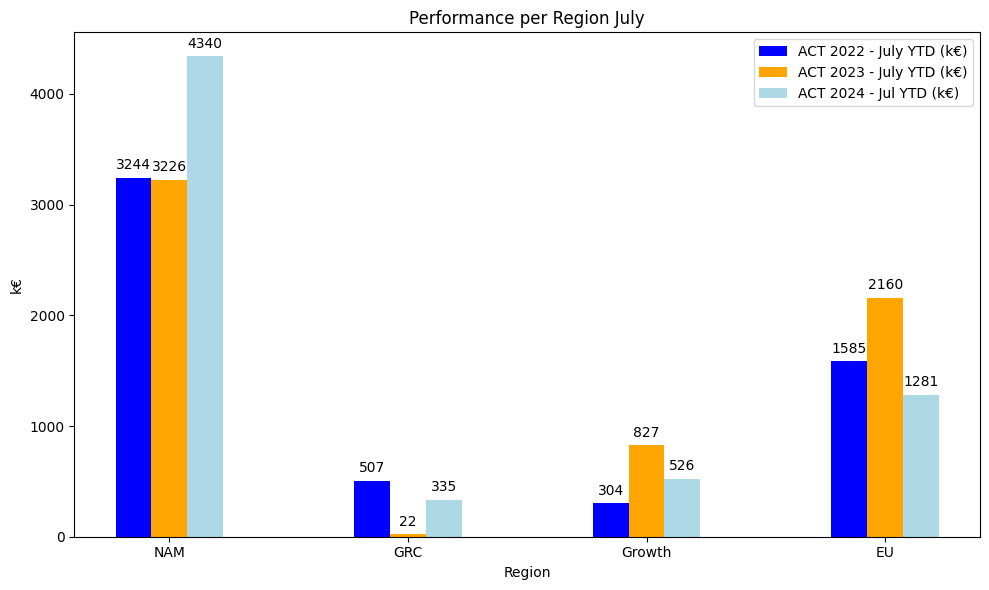

In [82]:
fig, ax = plt.subplots(figsize=(10,6))

# Bar width and positions
bar_width = 0.15  # Smaller bar width to create space between bars within each region
index = np.arange(len(temp['Region']))  # Create the index for each region

# Adjust spacing within each region by increasing the offset
bar1 = ax.bar(index - bar_width, temp['ACT 2022 - July YTD'], bar_width, label='ACT 2022 - July YTD (k€)', color='blue')
bar2 = ax.bar(index, temp['ACT 2023 - July YTD'], bar_width, label='ACT 2023 - July YTD (k€)', color='orange')
bar3 = ax.bar(index + bar_width, temp['ACT 2024 - Jul YTD (k€)'], bar_width, label='ACT 2024 - Jul YTD (k€)', color='lightblue')

# Adding the values above the bars
for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 50, round(yval, 1), ha='center', va='bottom')

for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 50, round(yval, 1), ha='center', va='bottom')

for bar in bar3:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 50, round(yval, 1), ha='center', va='bottom')

# Labeling the graph
ax.set_xlabel('Region')
ax.set_ylabel('k€')
ax.set_title('Performance per Region July')
ax.set_xticks(index)
ax.set_xticklabels(temp['Region'])
ax.legend()

plt.tight_layout()
plt.savefig('charts/Perfoemance per Region July', bbox_inches='tight')
plt.show()

AUGUST Performance per region

In [83]:
file_path_24 = "Data\CLV-IB Report - All Markets - Aug 2024 - Final.xlsb" 
file_path_23 = "Data_23\CLV Market Dashboard Aug_23.xlsx"


In [84]:
#2023 & 2022
report_per_prod_aug_23 = pd.read_excel(file_path_23, engine='openpyxl', sheet_name='Comparision')
report_per_prod_aug_23


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.09137,0.109061,0.071732,0.051847,0.093292,0.081676,0.059366,0.144602,NaN,NaN
1,Region,Market,2022,ACT 2022 - Aug YTD,AOP 2023 - Aug YTD,ACT 2023 - Aug YTD,NaN,NaN,NaN,NaN,...,Mei,Jun,Jul,Aug,Sep,Okt,Nov,Dec,Total,CHK
2,NAM,NAM,5819.19904,3491.35134,2627,3768,NaN,NaN,NaN,NaN,...,417.4746,628.4664,628.45167,246.90397,690.57955,355.00797,344.30711,937.95307,5819.19904,5819.19904
3,GRC,GRC,891.04854,553.398254,304,22,NaN,NaN,NaN,NaN,...,81.415218,97.178664,63.917107,46.198042,83.12761,72.777531,52.89793,128.847216,891.04854,891.04854
4,WE,APA,282.05474,165.51032,168,202.96466,NaN,NaN,NaN,NaN,...,5.82998,27.17707,16.08067,36.8286,9.40496,6.04231,52.08078,49.01637,282.05474,282.05474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,NaN,ISC,0,222.04489,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,JPN,70.859258,113.15693,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,LAT,-25.76077,162,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,META,89,83.08232,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
report_per_prod_aug_23 = report_per_prod_aug_23.drop(report_per_prod_aug_23.columns[6:26], axis=1)
report_per_prod_aug_23.head(50)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Region,Market,2022,ACT 2022 - Aug YTD,AOP 2023 - Aug YTD,ACT 2023 - Aug YTD
2,NAM,NAM,5819.19904,3491.35134,2627,3768
3,GRC,GRC,891.04854,553.398254,304,22
4,WE,APA,282.05474,165.51032,168,202.96466
5,WE,CEE,51.20567,31.802003,68,41
6,Growth,RCA,0,0,0,13
7,WE,BNL,621.8607,480.63949,487,217
8,WE,DAC,1068.22239,608.72885,683,669
9,WE,FRA,203.9944,126.693597,134,177


In [86]:
report_per_prod_aug_23 = report_per_prod_aug_23.drop(report_per_prod_aug_23.index[19:])
report_per_prod_aug_23

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Region,Market,2022,ACT 2022 - Aug YTD,AOP 2023 - Aug YTD,ACT 2023 - Aug YTD
2,NAM,NAM,5819.19904,3491.35134,2627,3768
3,GRC,GRC,891.04854,553.398254,304,22
4,WE,APA,282.05474,165.51032,168,202.96466
5,WE,CEE,51.20567,31.802003,68,41
6,Growth,RCA,0,0,0,13
7,WE,BNL,621.8607,480.63949,487,217
8,WE,DAC,1068.22239,608.72885,683,669
9,WE,FRA,203.9944,126.693597,134,177


In [87]:
report_per_prod_aug_23.columns = report_per_prod_aug_23.iloc[1]
report_per_prod_aug_23

1,Region,Market,2022,ACT 2022 - Aug YTD,AOP 2023 - Aug YTD,ACT 2023 - Aug YTD
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Region,Market,2022,ACT 2022 - Aug YTD,AOP 2023 - Aug YTD,ACT 2023 - Aug YTD
2,NAM,NAM,5819.19904,3491.35134,2627,3768
3,GRC,GRC,891.04854,553.398254,304,22
4,WE,APA,282.05474,165.51032,168,202.96466
5,WE,CEE,51.20567,31.802003,68,41
6,Growth,RCA,0,0,0,13
7,WE,BNL,621.8607,480.63949,487,217
8,WE,DAC,1068.22239,608.72885,683,669
9,WE,FRA,203.9944,126.693597,134,177


In [88]:
df_cleaned_aug = report_per_prod_aug_23.drop(0)


In [89]:
df_cleaned_aug

1,Region,Market,2022,ACT 2022 - Aug YTD,AOP 2023 - Aug YTD,ACT 2023 - Aug YTD
1,Region,Market,2022,ACT 2022 - Aug YTD,AOP 2023 - Aug YTD,ACT 2023 - Aug YTD
2,NAM,NAM,5819.19904,3491.35134,2627,3768
3,GRC,GRC,891.04854,553.398254,304,22
4,WE,APA,282.05474,165.51032,168,202.96466
5,WE,CEE,51.20567,31.802003,68,41
6,Growth,RCA,0,0,0,13
7,WE,BNL,621.8607,480.63949,487,217
8,WE,DAC,1068.22239,608.72885,683,669
9,WE,FRA,203.9944,126.693597,134,177
10,WE,IBE,28.71467,17.83365,106,11.05


In [90]:
df_cleaned_filt_aug = df_cleaned_aug.drop(1)
df_cleaned_filt_aug

1,Region,Market,2022,ACT 2022 - Aug YTD,AOP 2023 - Aug YTD,ACT 2023 - Aug YTD
2,NAM,NAM,5819.19904,3491.35134,2627,3768
3,GRC,GRC,891.04854,553.398254,304,22
4,WE,APA,282.05474,165.51032,168,202.96466
5,WE,CEE,51.20567,31.802003,68,41
6,Growth,RCA,0,0,0,13
7,WE,BNL,621.8607,480.63949,487,217
8,WE,DAC,1068.22239,608.72885,683,669
9,WE,FRA,203.9944,126.693597,134,177
10,WE,IBE,28.71467,17.83365,106,11.05
11,WE,IIG,96.33076,59.827576,95,708


In [91]:
df_cleaned_filt_aug.reset_index(drop=True, inplace=True)
df_cleaned_filt_aug

1,Region,Market,2022,ACT 2022 - Aug YTD,AOP 2023 - Aug YTD,ACT 2023 - Aug YTD
0,NAM,NAM,5819.19904,3491.35134,2627,3768
1,GRC,GRC,891.04854,553.398254,304,22
2,WE,APA,282.05474,165.51032,168,202.96466
3,WE,CEE,51.20567,31.802003,68,41
4,Growth,RCA,0,0,0,13
5,WE,BNL,621.8607,480.63949,487,217
6,WE,DAC,1068.22239,608.72885,683,669
7,WE,FRA,203.9944,126.693597,134,177
8,WE,IBE,28.71467,17.83365,106,11.05
9,WE,IIG,96.33076,59.827576,95,708


In [92]:
#2024

report_per_prod_aug_24 = pd.read_excel(file_path_24, sheet_name='Report per Product', header=[4, 5], index_col=[0, 1])
report_per_prod_aug_24



Column Labels            Column Labels                                       \
OIT                                OIT       OIT.1        OIT.2       OIT.3   
Row Labels    LY Actual            AOP   CY Actual   CY Act ITM        ∆ LY   
NAM          3675.181412      -261.704  3155.52442     885.2461 -519.656992   
GRC          194.610759            NaN     2.78939            0 -191.821369   
APA          260.264125     325.720053   418.27839     38.75342  158.014265   
CEE          27.55643          77.1064    35.47139            0     7.91496   
RCA          0.964322                0         NaN          NaN   -0.964322   
BNL          147.233508     189.333333    211.8888          3.7   64.655292   
DAC          446.641034       478.3744   330.89023    152.40069 -115.750804   
FRA          83.70283          86.3384   -41.59934            0  -125.30217   
IBE          335.861254        141.074    65.83396        1.513 -270.027294   
IIG          389.263916       539.7164   111.11725            0 -278.146666   
NOR          63.922176         92.1664   113.81816            0   49.895984   
UKI          187.165839       365.1756   199.69598            0   12.530141   
ISC         -4.527852                0           0     -1.53307    4.527852   
JPN          51.331945               0     3.17018            0  -48.161765   
LAT          238.877366       329.1498   131.40807      17.2156 -107.469296   
META         159.107987     227.943263   228.36899       22.767   69.261003   
Grand Total  6257.15705    2590.394049  4966.65587   1120.06274 -1290.50118   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN          NaN         NaN   
             6257.15705            NaN         NaN

In [93]:
cy_actual_aug = report_per_prod_aug_24['Column Labels', 'Sales.2'].dropna()
cy_actual_aug

Row Labels     LY Actual      CY Actual
NAM           3675.181412     4868.5831
GRC           194.610759       337.1229
APA           260.264125       270.0368
CEE           27.55643          40.3445
RCA           0.964322           0.0267
BNL           147.233508         167.74
DAC           446.641034       537.1935
FRA           83.70283         241.7769
IBE           335.861254        37.4425
IIG           389.263916       146.3513
NOR           63.922176           35.11
UKI           187.165839       187.5531
ISC          -4.527852          -0.2371
JPN           51.331945         16.3538
LAT           238.877366       170.0129
META          159.107987       167.3912
Grand Total   6257.15705      7222.8021
Name: (Column Labels, Sales.2), dtype: object

In [94]:
filtered_series_aug = cy_actual_aug.reset_index()
filtered_series_aug

,level_0,level_1,Column Labels
,,,Sales.2
0,Row Labels,LY Actual,CY Actual
1,NAM,3675.181412,4868.5831
2,GRC,194.610759,337.1229
3,APA,260.264125,270.0368
4,CEE,27.55643,40.3445
5,RCA,0.964322,0.0267
6,BNL,147.233508,167.74
7,DAC,446.641034,537.1935
8,FRA,83.70283,241.7769


In [95]:
filtered_series_aug = filtered_series_aug.drop(index=0)



In [96]:
data = []

column_names = ['Market','ACT 2022 - Aug YTD (k€)', 'ACT 2023 - Aug YTD (k€)', 'ACT 2024 - Aug YTD (k€)']
index_name = ['NAR','GRC','Growth','Growth','Growth','Growth','Growth','Growth','EU','EU','EU','EU','EU','EU','EU','EU','Grand Total']
performance_per_region_aug = pd.DataFrame(data,index=index_name , columns=column_names)
# performance_per_region_aug


In [97]:
filtered_series_aug['Column Labels', 'Sales.2']=filtered_series_aug['Column Labels', 'Sales.2'].map(round)
filtered_series_aug

,level_0,level_1,Column Labels
,,,Sales.2
1,NAM,3675.181412,4869
2,GRC,194.610759,337
3,APA,260.264125,270
4,CEE,27.55643,40
5,RCA,0.964322,0
6,BNL,147.233508,168
7,DAC,446.641034,537
8,FRA,83.70283,242
9,IBE,335.861254,37


In [98]:
performance_per_region_aug['ACT 2024 - Aug YTD (k€)'] = filtered_series_aug['Column Labels', 'Sales.2'].values
performance_per_region_aug['Market'] = filtered_series_aug['level_0'].values

performance_per_region_aug = performance_per_region_aug.rename_axis('Region')
performance_per_region_aug

# print(df)

,Market,ACT 2022 - Aug YTD (k€),ACT 2023 - Aug YTD (k€),ACT 2024 - Aug YTD (k€)
Region,,,,
NAR,NAM,NaN,NaN,4869
GRC,GRC,NaN,NaN,337
Growth,APA,NaN,NaN,270
Growth,CEE,NaN,NaN,40
Growth,RCA,NaN,NaN,0
Growth,BNL,NaN,NaN,168
Growth,DAC,NaN,NaN,537
Growth,FRA,NaN,NaN,242
EU,IBE,NaN,NaN,37


In [99]:
performance_per_region_aug.drop(columns = ["ACT 2022 - Aug YTD (k€)" , "ACT 2023 - Aug YTD (k€)"])

,Market,ACT 2024 - Aug YTD (k€)
Region,,
NAR,NAM,4869
GRC,GRC,337
Growth,APA,270
Growth,CEE,40
Growth,RCA,0
Growth,BNL,168
Growth,DAC,537
Growth,FRA,242
EU,IBE,37


In [100]:
df_cleaned_filt_aug

1,Region,Market,2022,ACT 2022 - Aug YTD,AOP 2023 - Aug YTD,ACT 2023 - Aug YTD
0,NAM,NAM,5819.19904,3491.35134,2627,3768
1,GRC,GRC,891.04854,553.398254,304,22
2,WE,APA,282.05474,165.51032,168,202.96466
3,WE,CEE,51.20567,31.802003,68,41
4,Growth,RCA,0,0,0,13
5,WE,BNL,621.8607,480.63949,487,217
6,WE,DAC,1068.22239,608.72885,683,669
7,WE,FRA,203.9944,126.693597,134,177
8,WE,IBE,28.71467,17.83365,106,11.05
9,WE,IIG,96.33076,59.827576,95,708


In [101]:
new_aug_df = performance_per_region_aug.merge(df_cleaned_filt_aug[['Market', 'ACT 2022 - Aug YTD', 'ACT 2023 - Aug YTD']], on='Market', how='inner')
new_aug_df

,Market,ACT 2022 - Aug YTD (k€),ACT 2023 - Aug YTD (k€),ACT 2024 - Aug YTD (k€),ACT 2022 - Aug YTD,ACT 2023 - Aug YTD
0,NAM,NaN,NaN,4869,3491.35134,3768
1,GRC,NaN,NaN,337,553.398254,22
2,APA,NaN,NaN,270,165.51032,202.96466
3,CEE,NaN,NaN,40,31.802003,41
4,RCA,NaN,NaN,0,0,13
5,BNL,NaN,NaN,168,480.63949,217
6,DAC,NaN,NaN,537,608.72885,669
7,FRA,NaN,NaN,242,126.693597,177
8,IBE,NaN,NaN,37,17.83365,11.05
9,IIG,NaN,NaN,146,59.827576,708


In [102]:
new_aug_df.drop(columns=['ACT 2022 - Aug YTD (k€)','ACT 2023 - Aug YTD (k€)'])

,Market,ACT 2024 - Aug YTD (k€),ACT 2022 - Aug YTD,ACT 2023 - Aug YTD
0,NAM,4869,3491.35134,3768
1,GRC,337,553.398254,22
2,APA,270,165.51032,202.96466
3,CEE,40,31.802003,41
4,RCA,0,0,13
5,BNL,168,480.63949,217
6,DAC,537,608.72885,669
7,FRA,242,126.693597,177
8,IBE,37,17.83365,11.05
9,IIG,146,59.827576,708


In [103]:
# Mapping regions to markets
region_map = {
    'NAM': 'NAR',
    'GRC': 'GRC',
    'APA': 'Growth',
    'RCA': 'Growth',
    'ISC': 'Growth',
    'JPN': 'Growth',
    'LAT': 'Growth',
    'MET': 'Growth',
    'CEE': 'EU',
    'BNL': 'EU',
    'DAC': 'EU',
    'FRA': 'EU',
    'IBE': 'EU',
    'IIG': 'EU',
    'NOR': 'EU',
    'UKI': 'EU'
}

# Add a new 'Region' column by mapping the 'Market' column
new_aug_df['Region'] = new_aug_df['Market'].map(region_map)

# Move 'Region' column to the front
new_aug_df = new_aug_df[['Region', 'Market',  'ACT 2022 - Aug YTD', 'ACT 2023 - Aug YTD','ACT 2024 - Aug YTD (k€)']]

In [104]:
new_aug_df[['ACT 2022 - Aug YTD', 'ACT 2023 - Aug YTD', 'ACT 2024 - Aug YTD (k€)']] = new_aug_df[['ACT 2022 - Aug YTD','ACT 2023 - Aug YTD','ACT 2024 - Aug YTD (k€)']].round().astype(int)

C:\Users\320267200\AppData\Local\Temp\ipykernel_22524\1040337963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_aug_df[['ACT 2022 - Aug YTD', 'ACT 2023 - Aug YTD', 'ACT 2024 - Aug YTD (k€)']] = new_aug_df[['ACT 2022 - Aug YTD','ACT 2023 - Aug YTD','ACT 2024 - Aug YTD (k€)']].round().astype(int)


In [105]:
new_aug_df

,Region,Market,ACT 2022 - Aug YTD,ACT 2023 - Aug YTD,ACT 2024 - Aug YTD (k€)
0,NAR,NAM,3491,3768,4869
1,GRC,GRC,553,22,337
2,Growth,APA,165,202,270
3,EU,CEE,31,41,40
4,Growth,RCA,0,13,0
5,EU,BNL,480,217,168
6,EU,DAC,608,669,537
7,EU,FRA,126,177,242
8,EU,IBE,17,11,37
9,EU,IIG,59,708,146


In [106]:

# Calculate totals for each column
aug_total_row = pd.DataFrame({
    'Region': ['Total'],
    'Market': ['Total'],
    'ACT 2022 - Aug YTD': [new_aug_df['ACT 2022 - Aug YTD'].sum()],
    'ACT 2023 - Aug YTD': [new_aug_df['ACT 2023 - Aug YTD'].sum()],
    'ACT 2024 - Aug YTD (k€)': [new_aug_df['ACT 2024 - Aug YTD (k€)'].sum()]
})

# Append the total row to the dataframe
aug_df_with_total = pd.concat([new_aug_df, aug_total_row], ignore_index=True)
aug_df_with_total.to_csv('aug_performance_per_region.csv', index=False)


aug_df_with_total



,Region,Market,ACT 2022 - Aug YTD,ACT 2023 - Aug YTD,ACT 2024 - Aug YTD (k€)
0,NAR,NAM,3491,3768,4869
1,GRC,GRC,553,22,337
2,Growth,APA,165,202,270
3,EU,CEE,31,41,40
4,Growth,RCA,0,13,0
5,EU,BNL,480,217,168
6,EU,DAC,608,669,537
7,EU,FRA,126,177,242
8,EU,IBE,17,11,37
9,EU,IIG,59,708,146


In [107]:
# Aggregate the data based on region categories
aug_data_agg = {
    'Region': ['NAM', 'GRC', 'Growth', 'EU'],
    'ACT 2022 - Aug YTD': [
        aug_df_with_total.loc[aug_df_with_total['Region'] == 'NAR', 'ACT 2022 - Aug YTD'].sum(),
        aug_df_with_total.loc[aug_df_with_total['Region'] == 'GRC', 'ACT 2022 - Aug YTD'].sum(),
        aug_df_with_total.loc[aug_df_with_total['Region'] == 'Growth', 'ACT 2022 - Aug YTD'].sum(),
        aug_df_with_total.loc[aug_df_with_total['Region'] == 'EU', 'ACT 2022 - Aug YTD'].sum()
    ],
    'ACT 2023 - Aug YTD': [
        aug_df_with_total.loc[aug_df_with_total['Region'] == 'NAR', 'ACT 2023 - Aug YTD'].sum(),
        aug_df_with_total.loc[aug_df_with_total['Region'] == 'GRC', 'ACT 2023 - Aug YTD'].sum(),
        aug_df_with_total.loc[aug_df_with_total['Region'] == 'Growth', 'ACT 2023 - Aug YTD'].sum(),
        aug_df_with_total.loc[aug_df_with_total['Region'] == 'EU', 'ACT 2023 - Aug YTD'].sum()
    ],
    'ACT 2024 - Aug YTD (k€)': [
        aug_df_with_total.loc[aug_df_with_total['Region'] == 'NAR', 'ACT 2024 - Aug YTD (k€)'].sum(),
        aug_df_with_total.loc[aug_df_with_total['Region'] == 'GRC', 'ACT 2024 - Aug YTD (k€)'].sum(),
        aug_df_with_total.loc[aug_df_with_total['Region'] == 'Growth', 'ACT 2024 - Aug YTD (k€)'].sum(),
        aug_df_with_total.loc[aug_df_with_total['Region'] == 'EU', 'ACT 2024 - Aug YTD (k€)'].sum()
    ]
}

# Create a new dataframe for aggregated data
aug_df_agg = pd.DataFrame(aug_data_agg)

# Append total row
aug_total_row = pd.DataFrame({
    'Region': ['Total'],
    'ACT 2022 - Aug YTD': [aug_df_agg['ACT 2022 - Aug YTD'].sum()],
    'ACT 2023 - Aug YTD': [aug_df_agg['ACT 2023 - Aug YTD'].sum()],
    'ACT 2024 - Aug YTD (k€)': [aug_df_agg['ACT 2024 - Aug YTD (k€)'].sum()]
})

aug_total = pd.concat([aug_df_agg, aug_total_row], ignore_index=True)

# Sorting the DataFrame based on the 'Region' column
region_order = ['NAM', 'GRC', 'Growth', 'EU', 'Total']
aug_total['Region'] = pd.Categorical(aug_total['Region'], categories=region_order, ordered=True)
aug_sorted_df = aug_total.sort_values(by='Region').reset_index(drop=True)

# Display the final sorted DataFrame with totals
aug_sorted_df


,Region,ACT 2022 - Aug YTD,ACT 2023 - Aug YTD,ACT 2024 - Aug YTD (k€)
0,NAM,3491,3768,4869
1,GRC,553,22,337
2,Growth,210,712,456
3,EU,1756,2353,1393
4,Total,6010,6855,7055


In [108]:
aug_temp = aug_sorted_df.drop(aug_sorted_df.index[-1])

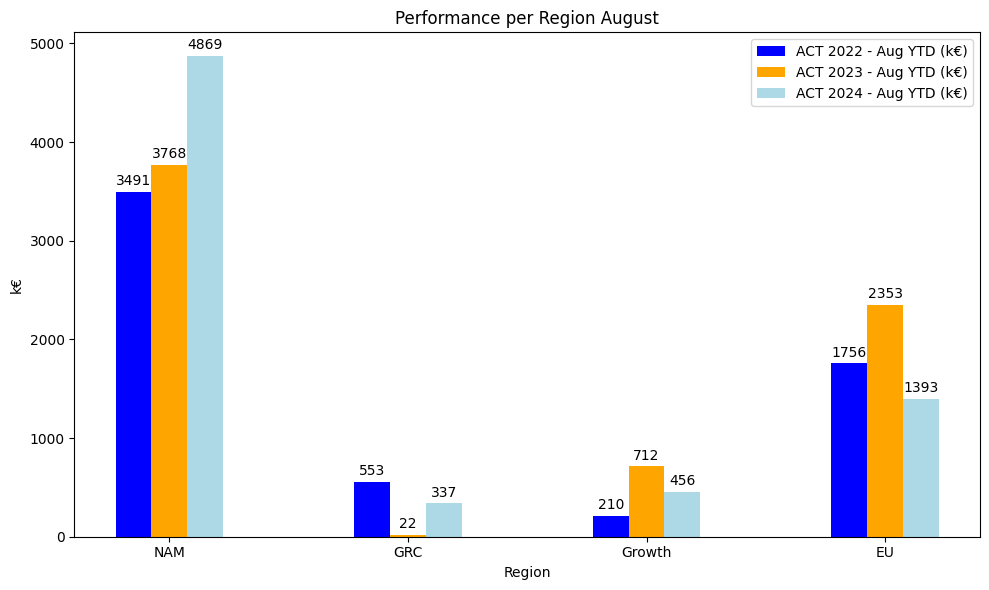

In [109]:
fig, ax = plt.subplots(figsize=(10,6))

# Bar width and positions
bar_width = 0.15  # Smaller bar width to create space between bars within each region
index = np.arange(len(aug_temp['Region']))  # Create the index for each region

# Adjust spacing within each region by increasing the offset
bar1 = ax.bar(index - bar_width, aug_temp['ACT 2022 - Aug YTD'], bar_width, label='ACT 2022 - Aug YTD (k€)', color='blue')
bar2 = ax.bar(index, aug_temp['ACT 2023 - Aug YTD'], bar_width, label='ACT 2023 - Aug YTD (k€)', color='orange')
bar3 = ax.bar(index + bar_width, aug_temp['ACT 2024 - Aug YTD (k€)'], bar_width, label='ACT 2024 - Aug YTD (k€)', color='lightblue')

# Adding the values above the bars
for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 40, round(yval, 1), ha='center', va='bottom')

for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 40, round(yval, 1), ha='center', va='bottom')

for bar in bar3:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 40, round(yval, 1), ha='center', va='bottom')

# Labeling the graph
ax.set_xlabel('Region')
ax.set_ylabel('k€')
ax.set_title('Performance per Region August')
ax.set_xticks(index)
ax.set_xticklabels(aug_temp['Region'])
ax.legend()

plt.tight_layout()
plt.savefig('charts/Performance per Region Aug', bbox_inches='tight')
plt.show()

September

In [110]:
report_per_prod_sep_23 = pd.read_excel('Data_23\CLV Market Dashboard_Sep_2023_YTD.xlsx', engine='openpyxl', sheet_name='Comparision')
report_per_prod_sep_23


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.059366,0.144602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Region,Market,2022,ACT 2022 - Sep YTD,AOP 2023 - Sep YTD,ACT 2023 - Sep YTD,NaN,NaN,NaN,NaN,...,Nov,Dec,Total,CHK,NaN,NaN,NaN,NaN,NaN,NaN
2,NAM,NAM,5819.19904,4181.93089,2988.658641,4316.33394,NaN,NaN,NaN,NaN,...,344.30711,937.95307,5819.19904,5819.19904,NaN,NaN,NaN,NaN,NaN,NaN
3,GRC,GRC,891.04854,636.525863,390.819696,22.249432,NaN,NaN,NaN,NaN,...,52.89793,128.847216,891.04854,891.04854,NaN,NaN,NaN,NaN,NaN,NaN
4,WE,APA,282.05474,174.91528,402.244345,241.513395,NaN,NaN,NaN,NaN,...,52.08078,49.01637,282.05474,282.05474,NaN,NaN,NaN,NaN,NaN,NaN
5,WE,CEE,51.20567,36.579077,70.749459,40.884538,NaN,NaN,NaN,NaN,...,3.039873,7.404432,51.20567,51.20567,NaN,NaN,NaN,NaN,NaN,NaN
6,Growth,RCA,0,0,0,13.410671,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,WE,BNL,621.8607,510.58371,564.90764,232.61939,NaN,NaN,NaN,NaN,...,11.03394,72.89802,621.8607,621.8607,NaN,NaN,NaN,NaN,NaN,NaN
8,WE,DAC,1068.22239,708.13911,659.643087,804.636868,NaN,NaN,NaN,NaN,...,56.04407,231.57342,1068.22239,1068.22239,NaN,NaN,NaN,NaN,NaN,NaN
9,WE,FRA,203.9944,145.724622,151.02599,224.13124,NaN,NaN,NaN,NaN,...,12.110318,29.497956,203.9944,203.9944,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
report_per_prod_sep_23 = report_per_prod_sep_23.drop(report_per_prod_sep_23.columns[6:], axis=1)
report_per_prod_sep_23

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Region,Market,2022,ACT 2022 - Sep YTD,AOP 2023 - Sep YTD,ACT 2023 - Sep YTD
2,NAM,NAM,5819.19904,4181.93089,2988.658641,4316.33394
3,GRC,GRC,891.04854,636.525863,390.819696,22.249432
4,WE,APA,282.05474,174.91528,402.244345,241.513395
5,WE,CEE,51.20567,36.579077,70.749459,40.884538
6,Growth,RCA,0,0,0,13.410671
7,WE,BNL,621.8607,510.58371,564.90764,232.61939
8,WE,DAC,1068.22239,708.13911,659.643087,804.636868
9,WE,FRA,203.9944,145.724622,151.02599,224.13124


In [112]:
report_per_prod_sep_23 = report_per_prod_sep_23.drop(report_per_prod_sep_23.index[20:])
report_per_prod_sep_23

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Region,Market,2022,ACT 2022 - Sep YTD,AOP 2023 - Sep YTD,ACT 2023 - Sep YTD
2,NAM,NAM,5819.19904,4181.93089,2988.658641,4316.33394
3,GRC,GRC,891.04854,636.525863,390.819696,22.249432
4,WE,APA,282.05474,174.91528,402.244345,241.513395
5,WE,CEE,51.20567,36.579077,70.749459,40.884538
6,Growth,RCA,0,0,0,13.410671
7,WE,BNL,621.8607,510.58371,564.90764,232.61939
8,WE,DAC,1068.22239,708.13911,659.643087,804.636868
9,WE,FRA,203.9944,145.724622,151.02599,224.13124


In [113]:
# report_per_prod_23.columns = report_per_prod_23.iloc[0]
report_per_prod_sep_23.columns = report_per_prod_sep_23.iloc[1]
report_per_prod_sep_23


1,Region,Market,2022,ACT 2022 - Sep YTD,AOP 2023 - Sep YTD,ACT 2023 - Sep YTD
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Region,Market,2022,ACT 2022 - Sep YTD,AOP 2023 - Sep YTD,ACT 2023 - Sep YTD
2,NAM,NAM,5819.19904,4181.93089,2988.658641,4316.33394
3,GRC,GRC,891.04854,636.525863,390.819696,22.249432
4,WE,APA,282.05474,174.91528,402.244345,241.513395
5,WE,CEE,51.20567,36.579077,70.749459,40.884538
6,Growth,RCA,0,0,0,13.410671
7,WE,BNL,621.8607,510.58371,564.90764,232.61939
8,WE,DAC,1068.22239,708.13911,659.643087,804.636868
9,WE,FRA,203.9944,145.724622,151.02599,224.13124


In [114]:
report_per_prod_sep_23.drop(index=19, inplace=True)


In [115]:
df_cleaned_sep = report_per_prod_sep_23.drop(0)
df_cleaned_sep.drop(1, inplace=True)
df_cleaned_sep

1,Region,Market,2022,ACT 2022 - Sep YTD,AOP 2023 - Sep YTD,ACT 2023 - Sep YTD
2,NAM,NAM,5819.19904,4181.93089,2988.658641,4316.33394
3,GRC,GRC,891.04854,636.525863,390.819696,22.249432
4,WE,APA,282.05474,174.91528,402.244345,241.513395
5,WE,CEE,51.20567,36.579077,70.749459,40.884538
6,Growth,RCA,0,0,0,13.410671
7,WE,BNL,621.8607,510.58371,564.90764,232.61939
8,WE,DAC,1068.22239,708.13911,659.643087,804.636868
9,WE,FRA,203.9944,145.724622,151.02599,224.13124
10,WE,IBE,28.71467,20.512497,101.27162,10.71116
11,WE,IIG,96.33076,68.814456,92.38656,727.63903


In [116]:
df_cleaned_sep.reset_index(drop=True, inplace=True)

In [117]:
df_cleaned_sep

1,Region,Market,2022,ACT 2022 - Sep YTD,AOP 2023 - Sep YTD,ACT 2023 - Sep YTD
0,NAM,NAM,5819.19904,4181.93089,2988.658641,4316.33394
1,GRC,GRC,891.04854,636.525863,390.819696,22.249432
2,WE,APA,282.05474,174.91528,402.244345,241.513395
3,WE,CEE,51.20567,36.579077,70.749459,40.884538
4,Growth,RCA,0,0,0,13.410671
5,WE,BNL,621.8607,510.58371,564.90764,232.61939
6,WE,DAC,1068.22239,708.13911,659.643087,804.636868
7,WE,FRA,203.9944,145.724622,151.02599,224.13124
8,WE,IBE,28.71467,20.512497,101.27162,10.71116
9,WE,IIG,96.33076,68.814456,92.38656,727.63903


In [118]:
df_cleaned_sep['Market'] = df_cleaned_sep['Market'].replace('MET', 'META')

In [119]:
df_cleaned_sep

1,Region,Market,2022,ACT 2022 - Sep YTD,AOP 2023 - Sep YTD,ACT 2023 - Sep YTD
0,NAM,NAM,5819.19904,4181.93089,2988.658641,4316.33394
1,GRC,GRC,891.04854,636.525863,390.819696,22.249432
2,WE,APA,282.05474,174.91528,402.244345,241.513395
3,WE,CEE,51.20567,36.579077,70.749459,40.884538
4,Growth,RCA,0,0,0,13.410671
5,WE,BNL,621.8607,510.58371,564.90764,232.61939
6,WE,DAC,1068.22239,708.13911,659.643087,804.636868
7,WE,FRA,203.9944,145.724622,151.02599,224.13124
8,WE,IBE,28.71467,20.512497,101.27162,10.71116
9,WE,IIG,96.33076,68.814456,92.38656,727.63903


September 2024

In [236]:
#2024
sep_file_path_24 = "Data\CLV-IB Report - All Markets - Sep 2024 - Final.xlsb" 


In [237]:
report_per_prod_sep_24 = pd.read_excel(sep_file_path_24, sheet_name='Report per Product', header=[4,5], index_col=[0,1])
report_per_prod_sep_24

Column Labels            Column Labels                                       \
OIT                                OIT       OIT.1        OIT.2       OIT.3   
Row Labels    LY Actual            AOP   CY Actual   CY Act ITM        ∆ LY   
NAM          4190.996347      -44.3608  4482.94923   1327.42484  291.952883   
GRC          221.92455             NaN     2.78939            0  -219.13516   
APA          296.792423     383.697133   490.76275     72.48436  193.970327   
CEE          31.423999         86.7997    50.03419      14.5628   18.610191   
RCA          1.099666                0         NaN          NaN   -1.099666   
BNL          167.89786             213    233.2019      21.3131    65.30404   
DAC          509.327495       538.7597   402.21723       71.327 -107.110265   
FRA          95.450596         97.3397   -31.66634        9.933 -127.116936   
IBE          382.999675         159.03   135.20256      69.3686 -247.797115   
IIG          443.897448       607.2497   146.77141     35.65416 -297.126038   
NOR          72.893709        117.4997   113.81816            0   40.924451   
UKI          213.434728       410.9903   201.12228       1.4263  -12.312448   
ISC         -5.16334                 0     1.53307      1.53307     6.69641   
JPN          58.536428               0     3.17018            0  -55.366248   
LAT          272.404014        381.465   131.40807            0 -140.995944   
META         181.438933     279.943263   277.39149      49.0225   95.952557   
Grand Total  7135.35453    3231.413396  6640.70557   1674.04973  -494.64896   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN          NaN         NaN   
             7135.35453            NaN         NaN

In [238]:
cy_actual_sep = report_per_prod_sep_24['Column Labels', 'Sales.2'].dropna()
cy_actual_sep

Row Labels     LY Actual      CY Actual
NAM           4190.996347     5387.0859
GRC           221.92455        339.4586
APA           296.792423       286.0449
CEE           31.423999         41.0362
RCA           1.099666           0.0267
BNL           167.89786        178.4705
DAC           509.327495       603.9037
FRA           95.450596         257.609
IBE           382.999675        45.9343
IIG           443.897448       152.5844
NOR           72.893709         38.8145
UKI           213.434728       216.4437
ISC          -5.16334           -0.2371
JPN           58.536428         22.0039
LAT           272.404014       185.9784
META          181.438933        172.537
Grand Total   7135.35453      7927.6946
Name: (Column Labels, Sales.2), dtype: object

In [239]:
filtered_series_sep = cy_actual_sep.reset_index()
filtered_series_sep

,level_0,level_1,Column Labels
,,,Sales.2
0,Row Labels,LY Actual,CY Actual
1,NAM,4190.996347,5387.0859
2,GRC,221.92455,339.4586
3,APA,296.792423,286.0449
4,CEE,31.423999,41.0362
5,RCA,1.099666,0.0267
6,BNL,167.89786,178.4705
7,DAC,509.327495,603.9037
8,FRA,95.450596,257.609


In [240]:
filtered_series_sep = filtered_series_sep.drop(index=0)

In [241]:
filtered_series_sep

,level_0,level_1,Column Labels
,,,Sales.2
1,NAM,4190.996347,5387.0859
2,GRC,221.92455,339.4586
3,APA,296.792423,286.0449
4,CEE,31.423999,41.0362
5,RCA,1.099666,0.0267
6,BNL,167.89786,178.4705
7,DAC,509.327495,603.9037
8,FRA,95.450596,257.609
9,IBE,382.999675,45.9343


In [242]:
data = []

column_names = ['Market','ACT 2022 - Sep YTD (k€)', 'ACT 2023 - Sep YTD (k€)', 'ACT 2024 - Sep YTD (k€)']
index_name = ['NAR','GRC','Growth','Growth','Growth','Growth','Growth','Growth','EU','EU','EU','EU','EU','EU','EU','EU','Grand Total']
performance_per_region_sep = pd.DataFrame(data,index=index_name , columns=column_names)
# performance_per_region_sep


In [243]:
filtered_series_sep['Column Labels', 'Sales.2']=filtered_series_sep['Column Labels', 'Sales.2'].map(round)
filtered_series_sep

,level_0,level_1,Column Labels
,,,Sales.2
1,NAM,4190.996347,5387
2,GRC,221.92455,339
3,APA,296.792423,286
4,CEE,31.423999,41
5,RCA,1.099666,0
6,BNL,167.89786,178
7,DAC,509.327495,604
8,FRA,95.450596,258
9,IBE,382.999675,46


In [244]:
performance_per_region_sep['ACT 2024 - Sep YTD (k€)'] = filtered_series_sep['Column Labels', 'Sales.2'].values
performance_per_region_sep['Market'] = filtered_series_sep['level_0'].values

performance_per_region_sep = performance_per_region_sep.rename_axis('Region')
performance_per_region_sep

# print(df)

,Market,ACT 2022 - Sep YTD (k€),ACT 2023 - Sep YTD (k€),ACT 2024 - Sep YTD (k€)
Region,,,,
NAR,NAM,NaN,NaN,5387
GRC,GRC,NaN,NaN,339
Growth,APA,NaN,NaN,286
Growth,CEE,NaN,NaN,41
Growth,RCA,NaN,NaN,0
Growth,BNL,NaN,NaN,178
Growth,DAC,NaN,NaN,604
Growth,FRA,NaN,NaN,258
EU,IBE,NaN,NaN,46


In [245]:
performance_per_region_sep.drop(columns = ["ACT 2022 - Sep YTD (k€)" , "ACT 2023 - Sep YTD (k€)"])

,Market,ACT 2024 - Sep YTD (k€)
Region,,
NAR,NAM,5387
GRC,GRC,339
Growth,APA,286
Growth,CEE,41
Growth,RCA,0
Growth,BNL,178
Growth,DAC,604
Growth,FRA,258
EU,IBE,46


In [246]:
new_sep_df = performance_per_region_sep.merge(df_cleaned_sep[['Market', 'ACT 2022 - Sep YTD', 'ACT 2023 - Sep YTD']], on='Market', how='inner')


In [247]:
new_sep_df

,Market,ACT 2022 - Sep YTD (k€),ACT 2023 - Sep YTD (k€),ACT 2024 - Sep YTD (k€),ACT 2022 - Sep YTD,ACT 2023 - Sep YTD
0,NAM,NaN,NaN,5387,4181.93089,4316.33394
1,GRC,NaN,NaN,339,636.525863,22.249432
2,APA,NaN,NaN,286,174.91528,241.513395
3,CEE,NaN,NaN,41,36.579077,40.884538
4,RCA,NaN,NaN,0,0,13.410671
5,BNL,NaN,NaN,178,510.58371,232.61939
6,DAC,NaN,NaN,604,708.13911,804.636868
7,FRA,NaN,NaN,258,145.724622,224.13124
8,IBE,NaN,NaN,46,20.512497,10.71116
9,IIG,NaN,NaN,153,68.814456,727.63903


In [248]:
new_sep_df = new_sep_df.drop(columns=['ACT 2022 - Sep YTD (k€)','ACT 2023 - Sep YTD (k€)'])


In [249]:
# Apply rounding using the built-in round function to avoid unnecessary changes
new_sep_df[['ACT 2022 - Sep YTD', 'ACT 2023 - Sep YTD', 'ACT 2024 - Sep YTD (k€)']] = new_sep_df[['ACT 2022 - Sep YTD', 'ACT 2023 - Sep YTD', 'ACT 2024 - Sep YTD (k€)']].applymap(lambda x: round(x))

# Display the updated dataframe
new_sep_df


C:\Users\320267200\AppData\Local\Temp\ipykernel_22524\3431955989.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_sep_df[['ACT 2022 - Sep YTD', 'ACT 2023 - Sep YTD', 'ACT 2024 - Sep YTD (k€)']] = new_sep_df[['ACT 2022 - Sep YTD', 'ACT 2023 - Sep YTD', 'ACT 2024 - Sep YTD (k€)']].applymap(lambda x: round(x))


,Market,ACT 2024 - Sep YTD (k€),ACT 2022 - Sep YTD,ACT 2023 - Sep YTD
0,NAM,5387,4182,4316
1,GRC,339,637,22
2,APA,286,175,242
3,CEE,41,37,41
4,RCA,0,0,13
5,BNL,178,511,233
6,DAC,604,708,805
7,FRA,258,146,224
8,IBE,46,21,11
9,IIG,153,69,728


In [250]:
# Mapping regions to markets
region_map = {
    'NAM': 'NAR',
    'GRC': 'GRC',
    'APA': 'Growth',
    'RCA': 'Growth',
    'ISC': 'Growth',
    'JPN': 'Growth',
    'LAT': 'Growth',
    'MET': 'Growth',
    'CEE': 'EU',
    'BNL': 'EU',
    'DAC': 'EU',
    'FRA': 'EU',
    'IBE': 'EU',
    'IIG': 'EU',
    'NOR': 'EU',
    'UKI': 'EU'
}

# Add a new 'Region' column by mapping the 'Market' column
new_sep_df['Region'] = new_sep_df['Market'].map(region_map)

# Move 'Region' column to the front
new_sep_df = new_sep_df[['Region', 'Market',  'ACT 2022 - Sep YTD', 'ACT 2023 - Sep YTD','ACT 2024 - Sep YTD (k€)']]

In [251]:
new_sep_df[['ACT 2022 - Sep YTD', 'ACT 2023 - Sep YTD', 'ACT 2024 - Sep YTD (k€)']] = new_sep_df[['ACT 2022 - Sep YTD','ACT 2023 - Sep YTD','ACT 2024 - Sep YTD (k€)']].round().astype(int)

In [271]:
# Calculate totals for each column
sep_total_row = pd.DataFrame({
    'Region': ['Total'],
    'Market': ['Total'],
    'ACT 2022 - Sep YTD': [new_sep_df['ACT 2022 - Sep YTD'].sum()],
    'ACT 2023 - Sep YTD': [new_sep_df['ACT 2023 - Sep YTD'].sum()],
    'ACT 2024 - Sep YTD (k€)': [new_sep_df['ACT 2024 - Sep YTD (k€)'].sum()]
})

new_sep_df.loc[15, 'Region'] = 'Growth'



# Append the total row to the dataframe
sep_df_with_total = pd.concat([new_sep_df, sep_total_row], ignore_index=True)
sep_df_with_total.to_csv('sep_performance_per_region.csv', index=False)


sep_df_with_total

,Region,Market,ACT 2022 - Sep YTD,ACT 2023 - Sep YTD,ACT 2024 - Sep YTD (k€)
0,NAR,NAM,4182,4316,5387
1,GRC,GRC,637,22,339
2,Growth,APA,175,242,286
3,EU,CEE,37,41,41
4,Growth,RCA,0,13,0
5,EU,BNL,511,233,178
6,EU,DAC,708,805,604
7,EU,FRA,146,224,258
8,EU,IBE,21,11,46
9,EU,IIG,69,728,153


In [272]:
# Aggregate the data based on region categories
sep_data_agg = {
    'Region': ['NAM', 'GRC', 'Growth', 'EU'],
    'ACT 2022 - Sep YTD': [
        sep_df_with_total.loc[sep_df_with_total['Region'] == 'NAR', 'ACT 2022 - Sep YTD'].sum(),
        sep_df_with_total.loc[sep_df_with_total['Region'] == 'GRC', 'ACT 2022 - Sep YTD'].sum(),
        sep_df_with_total.loc[sep_df_with_total['Region'] == 'Growth', 'ACT 2022 - Sep YTD'].sum(),
        sep_df_with_total.loc[sep_df_with_total['Region'] == 'EU', 'ACT 2022 - Sep YTD'].sum()
    ],
    'ACT 2023 - Sep YTD': [
        sep_df_with_total.loc[sep_df_with_total['Region'] == 'NAR', 'ACT 2023 - Sep YTD'].sum(),
        sep_df_with_total.loc[sep_df_with_total['Region'] == 'GRC', 'ACT 2023 - Sep YTD'].sum(),
        sep_df_with_total.loc[sep_df_with_total['Region'] == 'Growth', 'ACT 2023 - Sep YTD'].sum(),
        sep_df_with_total.loc[sep_df_with_total['Region'] == 'EU', 'ACT 2023 - Sep YTD'].sum()
    ],
    'ACT 2024 - Sep YTD (k€)': [
        sep_df_with_total.loc[sep_df_with_total['Region'] == 'NAR', 'ACT 2024 - Sep YTD (k€)'].sum(),
        sep_df_with_total.loc[sep_df_with_total['Region'] == 'GRC', 'ACT 2024 - Sep YTD (k€)'].sum(),
        sep_df_with_total.loc[sep_df_with_total['Region'] == 'Growth', 'ACT 2024 - Sep YTD (k€)'].sum(),
        sep_df_with_total.loc[sep_df_with_total['Region'] == 'EU', 'ACT 2024 - Sep YTD (k€)'].sum()
    ]
}

# Create a new dataframe for aggregated data
sep_df_agg = pd.DataFrame(sep_data_agg)

# Append total row
sep_total_row = pd.DataFrame({
    'Region': ['Total'],
    'ACT 2022 - Sep YTD': [sep_df_agg['ACT 2022 - Sep YTD'].sum()],
    'ACT 2023 - Sep YTD': [sep_df_agg['ACT 2023 - Sep YTD'].sum()],
    'ACT 2024 - Sep YTD (k€)': [sep_df_agg['ACT 2024 - Sep YTD (k€)'].sum()]
})

sep_total = pd.concat([sep_df_agg, sep_total_row], ignore_index=True)

# Sorting the DataFrame based on the 'Region' column
region_order = ['NAM', 'GRC', 'Growth', 'EU', 'Total']
sep_total['Region'] = pd.Categorical(sep_total['Region'], categories=region_order, ordered=True)
sep_sorted_df = sep_total.sort_values(by='Region').reset_index(drop=True)

# Display the final sorted DataFrame with totals
sep_sorted_df


,Region,ACT 2022 - Sep YTD,ACT 2023 - Sep YTD,ACT 2024 - Sep YTD (k€)
0,NAM,4182,4316,5387
1,GRC,637,22,339
2,Growth,322,963,667
3,EU,1971,2583,1535
4,Total,7112,7884,7928


In [273]:
sep_temp = sep_sorted_df.drop(sep_sorted_df.index[-1])

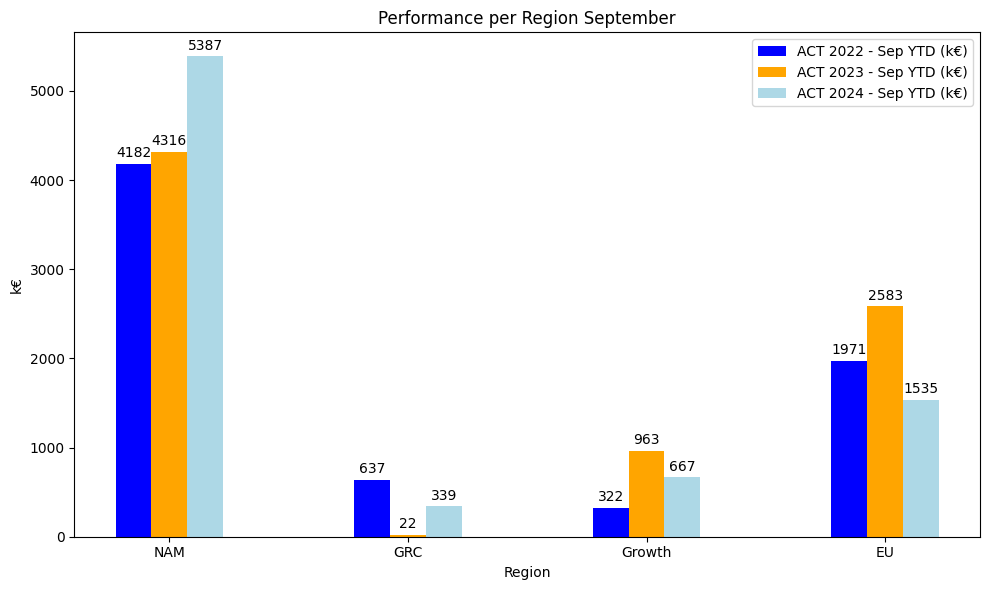

In [274]:
fig, ax = plt.subplots(figsize=(10,6))

# Bar width and positions
bar_width = 0.15  # Smaller bar width to create space between bars within each region
index = np.arange(len(sep_temp['Region']))  # Create the index for each region

# Adjust spacing within each region by increasing the offset
bar1 = ax.bar(index - bar_width, sep_temp['ACT 2022 - Sep YTD'], bar_width, label='ACT 2022 - Sep YTD (k€)', color='blue')
bar2 = ax.bar(index, sep_temp['ACT 2023 - Sep YTD'], bar_width, label='ACT 2023 - Sep YTD (k€)', color='orange')
bar3 = ax.bar(index + bar_width, sep_temp['ACT 2024 - Sep YTD (k€)'], bar_width, label='ACT 2024 - Sep YTD (k€)', color='lightblue')

# Adding the values above the bars
for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 40, round(yval, 1), ha='center', va='bottom')

for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 40, round(yval, 1), ha='center', va='bottom')

for bar in bar3:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 40, round(yval, 1), ha='center', va='bottom')

# Labeling the graph
ax.set_xlabel('Region')
ax.set_ylabel('k€')
ax.set_title('Performance per Region September')
ax.set_xticks(index)
ax.set_xticklabels(sep_temp['Region'])
ax.legend()

plt.tight_layout()
plt.savefig('charts/Performance per Region Sep', bbox_inches='tight')
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------------------------------

Function for sreenshot

In [256]:
import win32com.client as win32
import pyautogui
import time
import pythoncom
import os


# Disable the fail-safe (NOT RECOMMENDED)
pyautogui.FAILSAFE = False

# Function to get the index of a given column letter
def get_column_index(column):
    index = 0
    for char in column:
        index = index * 26 + (ord(char) - ord('A') + 1)
    return index

# Function to calculate the number of right-scrolls needed to reach the target column
def scroll_to_column(start_column, target_column):
    current_index = get_column_index(start_column)
    target_index = get_column_index(target_column)
    return max(0, target_index - current_index)

# Function to calculate the number of vertical scrolls based on row numbers
def scroll_to_row(start_row, target_row):
    return max(0, target_row - start_row)

# Modified capture_table_from_excel function with optional column scrolling
def capture_table_from_excel(file_path, sheet_name, region, screenshot_name, scroll_times=5, scroll_direction=None, zoom=65, target_column=None, use_column_scroll=False, target_row=None, use_row_scroll=False):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return
    pythoncom.CoInitialize()
    try:
        excel = win32.Dispatch('Excel.Application')  # open Excel
        excel.Visible = True
    
        workbook = excel.Workbooks.Open(file_path)
        sheet = workbook.Sheets(sheet_name)
        sheet.Activate()
    
        # Set zoom level
        excel.ActiveWindow.Zoom = zoom
        time.sleep(2)
        
        
        
         # Bring Excel window into focus
        excel_app_window = pyautogui.getWindowsWithTitle("Excel")[0]
        excel_app_window.activate()
        pyautogui.click(excel_app_window.left + 10, excel_app_window.top + 10)  # Click near top-left corner of Excel to focus
        
        # Horizontal scrolling logic for slide7 (if use_column_scroll is True)
        if use_column_scroll and target_column:
            start_column = 'A'  # Assuming you are starting at column A
            scroll_right_times = scroll_to_column(start_column, target_column)
            print(f"Scrolling {scroll_right_times} times to reach column {target_column}")
            
            for _ in range(scroll_right_times):
                pyautogui.press('right')
                time.sleep(0.1)  # Small delay between scrolls
                
        # Vertical scrolling logic (if use_row_scroll is True)
        if use_row_scroll and target_row:
            start_row = 1  # Assuming you are starting from row 1
            scroll_down_times = scroll_to_row(start_row, target_row)
            print(f"Scrolling {scroll_down_times} times to reach row {target_row}")
            
            for _ in range(scroll_down_times):
                pyautogui.press('down')
                time.sleep(0.1)  # Small delay between scrolls
       
        
                
        
        for _ in range(scroll_times):
            if scroll_direction == 'up':
                pyautogui.press('pageup')
                time.sleep(0.5)
            elif scroll_direction == 'down':
                pyautogui.press('pagedown')
                time.sleep(0.5)
            elif scroll_direction == 'right':
                pyautogui.press('right')
                time.sleep(0.1) 
            elif scroll_direction == 'left':
                pyautogui.press('left')
                time.sleep(0.1)   
            

        
        
        
        time.sleep(2)
        
        # Take screenshot after scrolling to the target region
        screenshot = pyautogui.screenshot(region=region)
        screenshot.save(screenshot_name)
        print(f"Screenshot saved: {screenshot_name}")
    
        # Close workbook and Excel application
        workbook.Close(SaveChanges=False)
        excel.Quit()

    finally:
        pythoncom.CoUninitialize()

Slide 7 CLV Performance Dashboard YTD


In [142]:
import win32com.client as win32
import pythoncom

def list_sheets_in_excel(file_path):
    pythoncom.CoInitialize()
    try:
        excel = win32.Dispatch('Excel.Application')
        workbook = excel.Workbooks.Open(file_path)
        sheet_names = [sheet.Name for sheet in workbook.Sheets]
        workbook.Close(SaveChanges=False)
        excel.Quit()
        return sheet_names
    finally:
        pythoncom.CoUninitialize()

file_path = r'C:\Users\320267200\OneDrive - Philips\Desktop\CLV automation\Data\DXR CLV Program Management_August.xlsb'
sheet_names = list_sheets_in_excel(file_path)
print("Available Sheets July:", sheet_names)

file_path = r'C:\Users\320267200\OneDrive - Philips\Desktop\CLV automation\Data\CLV-IB Report - All Markets - Aug 2024 - Final.xlsb'
sheet_names = list_sheets_in_excel(file_path)
print("Available Sheets August:", sheet_names)


Available Sheets July: ['Check-in', 'Progress report WS1', 'Progress report WS2', 'Progress report WS3', 'Progress report WS4', 'Project Plan', 'CLV Dasboard AOP Rate_Revised', 'CLV Dashboard AOP Rate ', 'Barts Report June', 'CLV Dashboard BS Rate', 'Growth Trend', 'Action Tracker', 'Sheet1', 'IM_Actions_Tracker', 'AOP22 Market split']
Available Sheets August: ['list', 'CLV-IB OIT Tables', 'CLV-IB Sales Tables', 'CLV-IB IGM Tables', 'CLV Overview', 'Data', 'Graph (Market)', 'Graph (Business)', 'IB Overview', 'Cube', 'Report per zone', 'Report per Product', 'Report per BM', 'Report per zone Progress', '% of sales PD']


Slide 5 YTD North America

In [143]:
#slide5
file_path = r'C:\Users\320267200\OneDrive - Philips\Desktop\CLV automation\Data\CLV-IB Report - All Markets - Aug 2024 - Final.xlsb'
sheet_name = 'CLV Overview'
screenshot_name="CLV Aug 2024 YTD- North America.png"

region = (60,355, 1100, 600)
capture_table_from_excel(file_path=file_path, sheet_name=sheet_name, region=region, screenshot_name=screenshot_name, zoom=60, scroll_direction='down', use_row_scroll=True, scroll_times=3)

Screenshot saved: CLV Aug 2024 YTD- North America.png


Slide 6 CLV YTD- International


In [144]:
#slide6
file_path = r'C:\Users\320267200\OneDrive - Philips\Desktop\CLV automation\Data\CLV-IB Report - All Markets - Aug 2024 - Final.xlsb'
sheet_name = 'CLV Overview'
screenshot_name="CLV Aug 2024 YTD- International.png"


region = (60,355, 1100, 600)
# capture_table_from_excel(file_path=file_path, sheet_name=sheet_name, region=region, screenshot_name=screenshot_name, zoom=60,scroll_direction='right' ,target_column='BU')
capture_table_from_excel(file_path=file_path, sheet_name=sheet_name, region=region, screenshot_name=screenshot_name, zoom=60, scroll_direction='left', target_column='T', use_column_scroll=True)
print("Screenshot Taken")

Scrolling 19 times to reach column T
Screenshot saved: CLV Aug 2024 YTD- International.png
Screenshot Taken


Slide 7 CLV Performance Dashboard 2024 

In [145]:
#slide7
file_path = r'C:\Users\320267200\OneDrive - Philips\Desktop\CLV automation\Data\DXR CLV Program Management_August.xlsb'
sheet_name = 'CLV Dasboard AOP Rate_Revised'
screenshot_name="CLV Performance Dashboard 2024-Aug YTD.png"



region = (50,364, 1240, 630)
# capture_table_from_excel(file_path=file_path, sheet_name=sheet_name, region=region, screenshot_name=screenshot_name, zoom=60,scroll_direction='right' ,target_column='BU')
capture_table_from_excel(file_path=file_path, sheet_name=sheet_name, region=region, screenshot_name=screenshot_name, zoom=60, scroll_direction='right', target_column='CD', use_column_scroll=True)
print("Screenshot Taken")

Scrolling 81 times to reach column CD
Screenshot saved: CLV Performance Dashboard 2024-Aug YTD.png
Screenshot Taken


Slide 8

In [146]:
# import pyautogui

# while True:
#     print(pyautogui.position())
#     time.sleep(2)

Slide 8 CLV Market Performance Dashboard 2024 

In [147]:
#slide8
file_path = r'C:\Users\320267200\OneDrive - Philips\Desktop\CLV automation\Data\CLV Market Dashboard_August 2024_YTD.xlsx'
sheet_name = 'Market Dashboard_F 24 Revised'
screenshot_name="CLV Market Performance Dashboard 2024 - Aug YTD.png"


region = (77,382, 1465, 667)
capture_table_from_excel(file_path=file_path, sheet_name=sheet_name, region=region, screenshot_name=screenshot_name, scroll_times=5, scroll_direction='up', use_column_scroll=False)
print("Screenshot Taken")

Screenshot saved: CLV Market Performance Dashboard 2024 - Aug YTD.png
Screenshot Taken


Creating ppts

In [264]:
#slide 3 value preparation
# Calculate IGM CY / Sales CY for the last row (dynamically)
last_row = months_data.iloc[-1]  # Get the last row dynamically
igm_cy_sales_cy_ratio = last_row['IGM CY'] / last_row['Sales CY']

igm_cy_sales_cy_ratio = int((igm_cy_sales_cy_ratio * 100).round())
igm_cy_sales_cy_ratio


27

In [275]:
#slide 4 preparation
perf_per_region_Sep = sep_df_with_total


# Apply comma formatting to the relevant columns (ACT 2022, ACT 2023, ACT 2024 - Sep YTD)
perf_per_region_Sep[['ACT 2022 - Sep YTD', 'ACT 2023 - Sep YTD', 'ACT 2024 - Sep YTD (k€)']] = perf_per_region_Sep[['ACT 2022 - Sep YTD', 'ACT 2023 - Sep YTD', 'ACT 2024 - Sep YTD (k€)']].applymap(lambda x: f"{x:,}")

perf_per_region_Sep

C:\Users\320267200\AppData\Local\Temp\ipykernel_22524\2885664872.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  perf_per_region_Sep[['ACT 2022 - Sep YTD', 'ACT 2023 - Sep YTD', 'ACT 2024 - Sep YTD (k€)']] = perf_per_region_Sep[['ACT 2022 - Sep YTD', 'ACT 2023 - Sep YTD', 'ACT 2024 - Sep YTD (k€)']].applymap(lambda x: f"{x:,}")


,Region,Market,ACT 2022 - Sep YTD,ACT 2023 - Sep YTD,ACT 2024 - Sep YTD (k€)
0,NAR,NAM,"4,182","4,316","5,387"
1,GRC,GRC,637,22,339
2,Growth,APA,175,242,286
3,EU,CEE,37,41,41
4,Growth,RCA,0,13,0
5,EU,BNL,511,233,178
6,EU,DAC,708,805,604
7,EU,FRA,146,224,258
8,EU,IBE,21,11,46
9,EU,IIG,69,728,153


In [284]:
#slide 4 preparation

# Ensure the columns are strings, replace commas, then convert to int
sep_df_with_total['ACT 2022 - Sep YTD'] = sep_df_with_total['ACT 2022 - Sep YTD'].astype(str).str.replace(',', '').astype(int)
sep_df_with_total['ACT 2023 - Sep YTD'] = sep_df_with_total['ACT 2023 - Sep YTD'].astype(str).str.replace(',', '').astype(int)
sep_df_with_total['ACT 2024 - Sep YTD (k€)'] = sep_df_with_total['ACT 2024 - Sep YTD (k€)'].astype(str).str.replace(',', '').astype(int)

# Calculate the ratio (last row to first row)
total_act_2024 = sep_df_with_total.iloc[-1]['ACT 2024 - Sep YTD (k€)']
first_act_2024 = sep_df_with_total.iloc[0]['ACT 2024 - Sep YTD (k€)']

# Calculate the ratio and round it
ratio = first_act_2024 /total_act_2024 
ratio_rounded = int(round(ratio, 2) * 100)

print(f"The ratio of the last row to the first row in ACT 2024 - Sep YTD (k€) is: {ratio_rounded}")


The ratio of the last row to the first row in ACT 2024 - Sep YTD (k€) is: 68


In [287]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor
from pptx.enum.shapes import MSO_SHAPE
from pptx.enum.text import PP_ALIGN
from pptx.enum.text import PP_ALIGN, MSO_AUTO_SIZE, MSO_ANCHOR
import pandas as pd


# Function to add gradient background
def set_gradient_background(slide, color_1, color_2, angle=325):
    background = slide.background
    fill = background.fill
    fill.gradient()
    fill.gradient_angle = angle
    stop_1 = fill.gradient_stops[0]
    stop_1.position = 0
    stop_1.color.rgb = color_1
    stop_2 = fill.gradient_stops[1]
    stop_2.position = 1
    stop_2.color.rgb = color_2


# Function to add a picture to the slide
def add_image(slide, image_path, left, top, width=None, height=None, border_width=Pt(0), border_color=RGBColor(0, 0, 0)):
    pic = slide.shapes.add_picture(image_path, left, top, width=width, height=height)
    if border_width > 0:
        pic.line.width = border_width
        pic.line.color.rgb = border_color


# Function to add a title to the slide
def add_title(slide, title_text, font_size, font_color, left=Inches(0.2), top=Inches(0.01), width=Inches(8), height=Inches(2)):
    title_shape = slide.shapes.add_textbox(left, top, width, height)
    title_frame = title_shape.text_frame
    title_frame.clear()
    title = title_frame.add_paragraph()
    title.text = title_text
    title.font.size = font_size
    title.font.color.rgb = font_color


# Function to add a table
def add_table(slide, data, left, top, width, height, font_size_header=Pt(11), font_size_content=Pt(11)):
    rows, cols = len(data), len(data[0])
    table_shape = slide.shapes.add_table(rows, cols, left, top, width, height)
    table = table_shape.table

    for col in range(cols):
        table.columns[col].width = Inches(1.5)
    
    for row in range(rows):
        for col in range(cols):
            cell = table.cell(row, col)
            cell.text = str(data[row][col])
            font_size = font_size_header if row == 0 else font_size_content
            for paragraph in cell.text_frame.paragraphs:
                paragraph.font.size = font_size


# Function to add a bullet list
def add_bullets(slide, bullets, left, top, width, height, font_size=Pt(12), bold_indices=None, line_spacing=Pt(12)):
    textbox = slide.shapes.add_textbox(left, top, width, height)
    text_frame = textbox.text_frame
    text_frame.word_wrap = True
    bold_indices = bold_indices or []
    
    for i, bullet in enumerate(bullets):
        p = text_frame.add_paragraph()
        p.text = bullet
        p.font.size = font_size
        p.font.bold = i in bold_indices
        p.space_after = line_spacing


#Function to add a shape
def add_shape(slide, shape_type, left, top, width, height,fill_color = RGBColor(255,255,255) ,bold_indices=None):
    shape = slide.shapes.add_shape(shape_type, left, top, width, height)
    fill = shape.fill
    fill.solid()
    fill.fore_color.rgb = fill_color
    text_frame = shape.text_frame
    text_frame.word_wrap = True
    bold_indices = bold_indices or []

# Create the presentation
prs = Presentation()
prs.slide_width = Inches(13)
prs.slide_height = Inches(7.5)
slide_layout = prs.slide_layouts[5]





# Slide 1 - Title Slide
slide_1 = prs.slides.add_slide(slide_layout)
set_gradient_background(slide_1, RGBColor(0, 52, 120), RGBColor(0, 137, 196))
add_image(slide_1, "assets/logo_txt.png", Inches(0.5), Inches(0.01), height=Inches(1))
add_title(slide_1, "DXR CLV Progress Report", Pt(36), RGBColor(255, 255, 255), Inches(1), Inches(3))
add_title(slide_1, "DXR CLV Team\nSep 2024", Pt(11), RGBColor(255, 255, 255), Inches(1), Inches(5), width=Inches(8), height=Inches(1))
add_image(slide_1, "assets/logo_innovation.png", Inches(1), Inches(6), height=Inches(0.5))

# Slide 2 - Business Updates and Plan for 2024
slide_2 = prs.slides.add_slide(slide_layout)
add_image(slide_2, "assets/logo_blue.png", Inches(12), Inches(0.3), width=Inches(0.5), height=Inches(0.6))
add_title(slide_2, "DXR CLV Business Updates & Plan for 2024", Pt(24), RGBColor(3, 70, 139), Inches(0.2), Inches(0.01))
add_title(slide_2, "DXR CLV sales -> strong YoY growth ~ 18% over last 3 years.", Pt(16), RGBColor(3, 70, 139), Inches(0.2), Inches(0.5))

# Table for data
data = [
    ["Year", "AOP", "Actual", "AOP Growth", "Actual Growth Vs LY", "Growth Vs AOP", "iGM AOP (%)", "iGM Actual (%)"],
    ["2020", "7,054", "", "", "4%", "6%", "", ""],
    ["2021", "6,904", "7,348", "", "", "6%", "56%", "31%"],
    ["2022", "8,629", "10,001", "25%", "36%", "16%", "56%", "31%"],
    ["2023", "10,234", "11,194", "19%", "12%", "9%", "56%", "31%"],
    ["2024", "11,923", "", "17%", "", "", "28%", f"{sep_weighted_igm_k_euros_per}%"]
]
add_table(slide_2, data, Inches(0.5), Inches(1.4), Inches(4), Inches(1))

# Bullets for highlights
bullets_2 = [
    "Releasing DiDi 2, 3 & ED5 Win 10 by Q1 2025",
    "Released this month CLV tool CLUE (AI based) for DXR along with other modalities",
    "Released 3D Camera & Auto Collimation Upgrade in Q2 2024",
    "Releasing Comfort Track to Comfort Position by Q3 2024",
    "CLV Roadmap for next 3 years, need QXP from regions"
]
add_bullets(slide_2, bullets_2, Inches(0.5), Inches(3.5), Inches(3), Inches(2), bold_indices=[1])
add_image(slide_2, "charts\Sep_2024_YTD_Revenue.png", Inches(5), Inches(3.3), Inches(7.4), Inches(4.5))



# Slide 3 - iGM YTD Progress
slide_3 = prs.slides.add_slide(slide_layout)
iGM_ytd = pd.read_csv("iGM_%_ITM_&_YTD.csv")
last_month = iGM_ytd["YTD iGM %"].iloc[-1]
third_last_month = iGM_ytd["YTD iGM %"].iloc[-3]

if last_month > third_last_month:
    improvement_text = f"Significant iGM Improvement in last 2 months from YTD {third_last_month}% to {last_month}%"
else:
    improvement_text = f"YTD iGM% has decreased from {third_last_month}% to {last_month}%"

bullets_3 = [f"CLV YTD iGM was negative till May . After June started improving (AOP Target {igm_cy_sales_cy_ratio}%)",
             f"Still NAR, YTD iGM @ 9%, need support from NAR to deep dive on reasons for lower CLV iGM%"
             ]

add_title(slide_3, f"CLV iGM % - ITM & YTD (AOP, 24 CLV iGM : {igm_cy_sales_cy_ratio}%, Actual YTD : {last_month}%)", Pt(24), RGBColor(3, 70, 139))
add_title(slide_3, improvement_text, Pt(18), RGBColor(3, 70, 139), Inches(0.2), Inches(0.5))
add_image(slide_3, "charts\iGM % - ITM & YTD_sep.png",  Inches(0.3), Inches(2.5), width=Inches(9), height=Inches(3.7))
add_shape(slide_3, MSO_SHAPE.ACTION_BUTTON_CUSTOM, Inches(9.3), Inches(2.7), Inches(3.4), Inches(2.7), fill_color=RGBColor(204,230,255))
add_bullets(slide_3, bullets_3, Inches(9.4), Inches(2.61), Inches(3.4), Inches(2.7), font_size=Pt(14))




#slide_4
slide_4 = prs.slides.add_slide(slide_layout)
add_image(slide_4, "assets/logo_blue.png", Inches(12), Inches(0.3))
add_title(slide_4, "Performance per Region Sep YTD", Pt(24), RGBColor(3, 70, 139), Inches(0.2), Inches(0.01))
add_title(slide_4, f"{ratio_rounded} % of YTD CLV sales is from NAR, however iGM% is still a concern", Pt(18), RGBColor(0,0,0), Inches(0.2), Inches(0.5))

perf_per_reg_df = pd.read_csv('sep_performance_per_region.csv')
# Define the table position and size
x, y, cx, cy = Inches(0.3), Inches(1.4), Inches(12), Inches(3)

# Add a table to the slide
rows, cols = perf_per_region_Sep.shape
table = slide_4.shapes.add_table(rows+1, cols, x, y, cx, cy).table  # Add 1 extra row for the header

# Set column headers
for col_idx, col_name in enumerate(perf_per_region_Sep.columns):
    cell = table.cell(0, col_idx)
    cell.text = col_name
    cell.text_frame.paragraphs[0].font.size = Pt(11)

# Fill the table with DataFrame values
for row_idx, row in perf_per_region_Sep.iterrows():
    for col_idx, value in enumerate(row):
        cell = table.cell(row_idx + 1, col_idx)
        cell.text = str(value)
        cell.text_frame.paragraphs[0].font.size = Pt(10)
        
for col in range(cols):
    table.columns[col].width = Inches(1)


add_title(slide_4, "NAR iGM Increased from -14% May YTD to 17% Sep YTD", Pt(18),  RGBColor(0,0,0), Inches(5.8), Inches(1), Inches(8), Inches(2))
add_image(slide_4, "charts\Performance per Region Sep.png", Inches(5.6), Inches(2.4), width=Inches(7), height=Inches(4.5) )




#slide5
slide_5 = prs.slides.add_slide(slide_layout)
add_image(slide_5, "assets/logo_blue.png", Inches(12), Inches(0.3))
add_title(slide_5, "CLV Sep 2024 YTD- North America", Pt(24), RGBColor(3, 70, 139), Inches(0.2), Inches(0.01))
add_title(slide_5, "All DI modalities facing headwind @ NAR for CLV iGM%", Pt(18), RGBColor(0,0,0), Inches(0.2), Inches(0.5))
add_image(slide_5, "screenshots\september_ytd_northamerica.png",  Inches(1), Inches(1.5), width=Inches(10.5), height=Inches(6))


#slide6
slide_6 = prs.slides.add_slide(slide_layout)
add_image(slide_6, "assets/logo_blue.png", Inches(12), Inches(0.3))
add_title(slide_6, "CLV Sep 2024 YTD- International Markets", Pt(24), RGBColor(3, 70, 139), Inches(0.2), Inches(0.01))
add_title(slide_6, "Only DXR Sales performance is poor in International Markets Vs other modalities", Pt(18), RGBColor(0,0,0), Inches(0.2), Inches(0.5))
add_image(slide_6, "screenshots\september_international_ytd.png",  Inches(1), Inches(1.5), width=Inches(10.5), height=Inches(6))



#slide7
slide_7 = prs.slides.add_slide(slide_layout)
add_image(slide_7, "assets/logo_blue.png", Inches(12), Inches(0.3))
add_title(slide_7, "CLV Performance Dashboard 2024 - Sep YTD", Pt(24),  RGBColor(3, 70, 139), Inches(0.2), Inches(0.01))
add_title(slide_7, "Total September YTD Sales exceeding AOP by 4%, Customer NPS back to Green, Growing IB Win Rate",  Pt(18), RGBColor(0,0,0), Inches(0.2), Inches(0.5))
add_image(slide_7, "screenshots\clv_performance dashboard.png", Inches(1), Inches(1.5), height=Inches(5.5), width=Inches(10))


#slide8
slide_8 = prs.slides.add_slide(slide_layout)
add_image(slide_8, "assets/logo_blue.png", Inches(12), Inches(0.3))
add_title(slide_8, "CLV Market Performance Dashboard 2024 - Sep YTD", Pt(24),  RGBColor(3, 70, 139), Inches(0.2), Inches(0.01))
add_title(slide_8, "70 % of YTD CLV sales is from NAR",  Pt(18), RGBColor(0,0,0), Inches(0.2), Inches(0.5))
add_image(slide_8, "screenshots\clv_market_performance_dashboard.png", Inches(1), Inches(1.5), height=Inches(5.5), width=Inches(10))



# Save the presentation
prs.save('PPT/dxr_clv_progress_report_september.pptx')

print("PowerPoint presentation created successfully.")


PowerPoint presentation created successfully.


In [149]:
# from pptx import Presentation
# from pptx.util import Inches, Pt
# from pptx.dml.color import RGBColor
# from pptx.enum.shapes import MSO_SHAPE
# from pptx.enum.text import PP_ALIGN
# from pptx.enum.text import PP_ALIGN, MSO_AUTO_SIZE, MSO_ANCHOR




# prs = Presentation()
# prs.slide_width = Inches(13)
# prs.slide_height = Inches(7.5)
# slide_layout = prs.slide_layouts[5]

# #slide1
  
# slide_1 = prs.slides.add_slide(slide_layout)
# background = slide_1.background
# fill = background.fill
# fill.gradient()
# fill.gradient_angle = 325
# stop_1 = fill.gradient_stops[0]
# stop_1.position = 0
# stop_1.color.rgb = RGBColor(0, 52, 120)

# stop_2 = fill.gradient_stops[1]
# stop_2.position = 1
# stop_2.color.rgb = RGBColor(0, 137, 196)


# logo_path = "assets\logo_txt.png"  
# left = Inches(0.5)
# top = Inches(0.01)
# height = Inches(1)
# slide_1.shapes.add_picture(logo_path, left, top, height=height)

# # Add the title text
# title_shape = slide_1.shapes.add_textbox(Inches(1), Inches(3), Inches(8), Inches(2))
# title_frame = title_shape.text_frame
# title = title_frame.add_paragraph()
# title.text = "DXR CLV Progress Report"
# title.font.name = "Calibri Light"
# title.font.size = Pt(36)

# title.font.color.rgb = RGBColor(255, 255, 255)  # White color

# # Add the team and date text
# team_shape = slide_1.shapes.add_textbox(Inches(1), Inches(5), Inches(8), Inches(1))
# team_frame = team_shape.text_frame
# team_paragraph = team_frame.add_paragraph()
# team_paragraph.text = "DXR CLV Team\nAug 2024"
# team_paragraph.font.name = "Calibri"
# team_paragraph.font.size = Pt(11)
# team_paragraph.font.color.rgb = RGBColor(255, 255, 255)  # White color


# innovation_logo_path = "assets\logo_innovation.png"  # Replace with actual logo path
# left = Inches(1)
# top = Inches(6)
# height = Inches(0.5)
# slide_1.shapes.add_picture(innovation_logo_path, left, top, height=height)






# #slide2
# slide_layout = prs.slide_layouts[5]
# slide2 = prs.slides.add_slide(slide_layout)

# #philips_shield
# philips_shield_path = "assets\logo_blue.png" 
# right = Inches(12)
# top = Inches(0.3)
# width=Inches(0.5)
# slide2.shapes.add_picture(philips_shield_path,  right, top,width=width, height=Inches(0.6))

# title_shape = slide2.shapes.add_textbox(Inches(0.2), Inches(0.01), Inches(8), Inches(2))
# title = slide2.shapes.title
# # title.text = "DXR CLV Business Updates & Plan for 2024"
# title_frame = title_shape.text_frame
# title = title_frame.add_paragraph()
# title.text = "DXR CLV Business Updates & Plan for 2024"
# title.font.size = Pt(24)
# title.font.color.rgb = RGBColor(3, 70, 139)

# sub_heading = title_frame.add_paragraph()
# sub_heading.text = "DXR CLV sales -> strong YoY growth ~ 18% over last 3 years. iGM headwinds for 2024 "
# sub_heading.font.size = Pt(16)
# # sub_heading.font.color.rgb = RGBColor(255, 255, 255)  # White color

# data = [
#     ["Year", "AOP", "Actual", "AOP Growth", "Actual Growth Vs LY", "Growth Vs AOP", "iGM AOP (%)", "iGM Actual (%)"],
#     ["2020", "7,054", "", "", "4%", "6%", "", ""],
#     ["2021", "6,904", "7,348", "", "", "6%", "56%", "31%"],
#     ["2022", "8,629", "10,001", "25%", "36%", "16%", "56%", "31%"],
#     ["2023", "10,234", "11,194", "19%", "12%", "9%", "56%", "31%"],
#     ["2024", "11,923", "", "17%", "", "", "28%", "20%"]
# ]

# rows, cols = len(data), len(data[0])
# left, top, width, height = Inches(0.5), Inches(1.5), Inches(4), Inches(1)
# table_shape = slide2.shapes.add_table(rows, cols, left, top, width, height)
# table = table_shape.table

# for col in range(cols):
#     table.columns[col].width = Inches(1.5)
    
# for row in range(rows):
#     for col in range(cols):
#         cell = table.cell(row, col)
#         cell.text = data[row][col]
        
#         if row == 0:
#             for paragraph in cell.text_frame.paragraphs:
#                 paragraph.font.size = Pt(12)
#         else:
#             for paragraph in cell.text_frame.paragraphs:
#                 paragraph.font.size = Pt(10)             


# #textbox for key highlights and plan for 2024
# title_box = slide2.shapes.add_textbox(Inches(0.5), Inches(3.5), Inches(3), Inches(0.5))
# title_frame = title_box.text_frame
# title_frame.word_wrap = True
# title_frame.auto_size = MSO_AUTO_SIZE.TEXT_TO_FIT_SHAPE
# title_frame.vertical_anchor = MSO_ANCHOR.MIDDLE
# title = title_frame.add_paragraph()
# title.text = "Key Highlights & Plan for 2024"
# title.font.bold = True
# title.font.size = Pt(14)
# title.font.color.rgb = RGBColor(255,255,255)
# title.alignment = PP_ALIGN.CENTER

# #background color
# title_box.fill.solid()
# title_box.fill.fore_color.rgb = RGBColor(0, 102, 204) #blue background
# #text box for content
# content_box = slide2.shapes.add_textbox(Inches(0.5), Inches(4), Inches(3), Inches(2))
# content_frame = content_box.text_frame
# content_frame.word_wrap = True

# bullets = [
#     "Releasing DiDi 2, 3 & ED5 Win 10 by Q1 2025",
#     "Released this month CLV tool CLUE (AI based) for DXR along with other modalities",
#     "Released 3D Camera & Auto Collimation Upgrade in Q2 2024",
#     "Releasing Comfort Track to Comfort Position by Q3 2024",
#     "CLV Roadmap for next 3 years, need QXP from regions"
# ]

# for bullet in bullets:
#     p = content_frame.add_paragraph()
#     p.text = bullet
#     p.font.size = Pt(12)
#     p.level = 0
    
#     # Format for bold text in second bullet
#     if bullet.startswith("Released this month"):
#         p.font.bold = True
#     else:
#         p.font.bold = False





# aug_2024_ytd_revenue = "charts\Aug 2024 YTD Revenue.png" 
# slide2_left = Inches(6.3)
# slide2_top = Inches(3.5)
# slide2_height = Inches(3.7)
# slide2_width = Inches(3)
# slide2.shapes.add_picture(aug_2024_ytd_revenue, slide2_left, slide2_top, width=slide2_width, height=slide2_height)
# slide2.shapes.add_picture(aug_2024_ytd_revenue, slide2_left, slide2_top, height=slide2_height).line.color.rgb = RGBColor(0,0,0) 
# slide2.shapes.add_picture(aug_2024_ytd_revenue, slide2_left, slide2_top, height=slide2_height).line.width = Pt(2)
# slide2.shapes.add_picture(aug_2024_ytd_revenue, slide2_left, slide2_top, height=slide2_height)




# #slide3

# iGM_ytd = pd.read_csv("iGM_%_ITM_&_YTD.csv")
# last_month = iGM_ytd["YTD iGM %"].iloc[-1]
# third_last_month = iGM_ytd["YTD iGM %"].iloc[-3]
# # improvement = last_month - third_last_month

# if last_month > third_last_month:
#     improvement_text = f"Significant iGM Improvement in last 2 months from YTD {third_last_month}% to {last_month}%"
# else:
#     improvement_text = f"YTD iGM% has decreased from {third_last_month}% to {last_month}%"

# slide3 = prs.slides.add_slide(slide_layout)

# title_shape = slide3.shapes.add_textbox(Inches(0.2), Inches(0.01), Inches(8), Inches(2))
# title = slide3.shapes.title

# #philips_shield
# philips_shield_path = "assets\logo_blue.png"  # Replace with actual
# right = Inches(12)
# top = Inches(0.3)
# width=Inches(0.5)
# slide3.shapes.add_picture(philips_shield_path,  right, top,width=width, height=Inches(0.6))

# title_frame = title_shape.text_frame
# title = title_frame.add_paragraph()
# title.text = f"CLV iGM % - ITM & YTD (AOP,24 CLV iGM : 28%, Actual YTD : {last_month}%)"
# title.font.size = Pt(24)
# title.font.color.rgb = RGBColor(3, 70, 139)

# sub_heading = title_frame.add_paragraph()
# sub_heading.text = improvement_text
# sub_heading.font.size = Pt(18)

# iGM_per_and_ytd_path = "charts\iGM % - ITM & YTD.png" 
# left = Inches(0.3)
# top = Inches(2.5)
# height = Inches(3)
# slide3.shapes.add_picture(iGM_per_and_ytd_path, left, top, width=Inches(2), height=height)
# slide3.shapes.add_picture(iGM_per_and_ytd_path, left, top, height=height).line.color.rgb = RGBColor(0,0,0) 
# slide3.shapes.add_picture(iGM_per_and_ytd_path, left, top, height=height).line.width = Pt(2)
# slide3.shapes.add_picture(iGM_per_and_ytd_path, left, top, height=height)

# # Add text box
# text_shape = slide3.shapes.add_textbox(Inches(8.5), Inches(2.5), Inches(1), Inches(2))
# text_frame = text_shape.text_frame
# text_frame.clear()

# paragraph1 = text_frame.add_paragraph()
# paragraph1.text = "CLV YTD iGM was negative till May. \nAfter June started improving (AOP Target 28%)."
# paragraph1.font.size = Pt(14)
# paragraph1.level = 0

# paragraph2 = text_frame.add_paragraph()
# paragraph2.text = "Still NAR, YTD iGM @ 9%, need support from NAR \nto deep dive on reasons for lower CLV iGM%"
# paragraph2.font.size = Pt(14)
# paragraph2.level = 0




# #slide4
# slide_4 = prs.slides.add_slide(slide_layout)

# title_shape = slide_4.shapes.add_textbox(Inches(0.2), Inches(0.01), Inches(8), Inches(2))
# title = slide_4.shapes.title

# #philips_shield
# philips_shield_path = "assets\logo_blue.png"  
# right = Inches(12)
# top = Inches(0.3)
# width=Inches(0.5)
# slide_4.shapes.add_picture(philips_shield_path,  right, top,width=width, height=Inches(0.6))

# title_frame = title_shape.text_frame
# title = title_frame.add_paragraph()
# title.text = "Performance per Region Aug YTD"  #make dynamic
# title.font.size = Pt(24)
# title.font.color.rgb = RGBColor(3, 70, 139)

# sub_heading = title_frame.add_paragraph()
# sub_heading.text = "70 % of YTD CLV sales is from NAR, however iGM% is still a concern" #make dynamic
# sub_heading.font.size = Pt(18)



# perf_per_reg_df = pd.read_csv('aug_performance_per_region.csv')
# # Define the table position and size
# x, y, cx, cy = Inches(0.3), Inches(1.4), Inches(12), Inches(3)

# # Add a table to the slide
# rows, cols = perf_per_reg_df.shape
# table = slide_4.shapes.add_table(rows+1, cols, x, y, cx, cy).table  # Add 1 extra row for the header

# # Set column headers
# for col_idx, col_name in enumerate(perf_per_reg_df.columns):
#     cell = table.cell(0, col_idx)
#     cell.text = col_name
#     cell.text_frame.paragraphs[0].font.size = Pt(11)

# # Fill the table with DataFrame values
# for row_idx, row in perf_per_reg_df.iterrows():
#     for col_idx, value in enumerate(row):
#         cell = table.cell(row_idx + 1, col_idx)
#         cell.text = str(value)
#         cell.text_frame.paragraphs[0].font.size = Pt(10)
        
# for col in range(cols):
#     table.columns[col].width = Inches(1)


# title_shape = slide_4.shapes.add_textbox(Inches(5.3), Inches(1), Inches(8), Inches(2))
# para = slide_4.shapes.title

# title_frame = title_shape.text_frame
# para = title_frame.add_paragraph()
# para.text = "NAR iGM Increased from -14% May YTD to 9% Jul YTD"  #make dynamic
# para.font.size = Pt(18)


# # Add the bar plot image beside the table
# bar_plot_image_path = "charts/Performance per Region Aug.png"  # Replace with your plot's file path
# x_image = Inches(5.6)  # Position next to the table
# y_image = Inches(2.4)  # Same y as table
# width_image = Inches(7)  
# height_image = Inches(4.5)  

# slide_4.shapes.add_picture(bar_plot_image_path, x_image, y_image, width_image, height_image)




# #slide_5
# slide_5 = prs.slides.add_slide(slide_layout)
# title_shape = slide_5.shapes.add_textbox(Inches(0.2), Inches(0.01), Inches(8), Inches(2))
# title = slide_5.shapes.title

# slide_5.shapes.add_picture(philips_shield_path,  right, top,width=width, height=Inches(0.6))
# title_frame = title_shape.text_frame
# title = title_frame.add_paragraph()
# title.text = "CLV Jul 2024 YTD- North America"
# title.font.size = Pt(24)
# title.font.color.rgb = RGBColor(3, 70, 139)
# sub_heading = title_frame.add_paragraph()
# sub_heading.text = "All DI modalities facing headwind @ NAR for CLV iGM%"
# sub_heading.font.size = Pt(18)

# #add screenshot
# north_america = "CLV Aug 2024 YTD- North America.png"  
# x_image_5 = Inches(1)  # Position next to the table
# y_image_5 = Inches(1.5)  # Same y as table
# width_image_5 = Inches(10.5)  
# height_image_5 = Inches(6)  

# slide_5.shapes.add_picture(north_america, x_image_5, y_image_5, width_image_5, height_image_5)




# #slide6
# slide_6 = prs.slides.add_slide(slide_layout)
# title_shape = slide_6.shapes.add_textbox(Inches(0.2), Inches(0.01), Inches(8), Inches(2))
# title = slide_6.shapes.title

# slide_6.shapes.add_picture(philips_shield_path,  right, top,width=width, height=Inches(0.6))
# title_frame = title_shape.text_frame
# title = title_frame.add_paragraph()
# title.text = "CLV Ju 2024 YTD- International Markets"
# title.font.size = Pt(24)
# title.font.color.rgb = RGBColor(3, 70, 139)
# sub_heading = title_frame.add_paragraph()
# sub_heading.text = "Only DXR Sales performance is poor in International Markets Vs other modalities"
# sub_heading.font.size = Pt(18)



# #add screenshot
# international_reg = "CLV Aug 2024 YTD- International.png"  
# x_image_6 = Inches(1)  # Position next to the table
# y_image_6 = Inches(1.5)  # Same y as table
# width_image_6 = Inches(10.5)  
# height_image_6 = Inches(6)  
# slide_6.shapes.add_picture(international_reg, x_image_6, y_image_6, width_image_6, height_image_6)



# #slide7
# slide_7 = prs.slides.add_slide(slide_layout)
# title_shape = slide_7.shapes.add_textbox(Inches(0.2), Inches(0.01), Inches(8), Inches(2))
# title = slide_7.shapes.title

# slide_7.shapes.add_picture(philips_shield_path,  right, top,width=width, height=Inches(0.6))
# title_frame = title_shape.text_frame
# title = title_frame.add_paragraph()
# title.text = "CLV Performance Dashboard 2024 - Aug YTD"
# title.font.size = Pt(24)
# title.font.color.rgb = RGBColor(3, 70, 139)
# sub_heading = title_frame.add_paragraph()
# sub_heading.text = "Total July YTD Sales exceeding AOP by 4%, Customer NPS back to Green, Growing IB Win Rate"
# sub_heading.font.size = Pt(18)
# CLV_Market_Performance = "CLV Performance Dashboard 2024-Aug YTD.png" 
# slide7_left = Inches(0.5)
# slide7_top = Inches(1.2)
# slide7_height = Inches(5.5)
# slide_7.shapes.add_picture(CLV_Market_Performance, slide7_left, slide7_top, width=Inches(3), height=slide7_height)
# slide_7.shapes.add_picture(CLV_Market_Performance, slide7_left, slide7_top, height=slide7_height).line.color.rgb = RGBColor(0,0,0) 
# slide_7.shapes.add_picture(CLV_Market_Performance, slide7_left, slide7_top, height=slide7_height).line.width = Pt(2)
# slide_7.shapes.add_picture(CLV_Market_Performance, slide7_left, slide7_top, height=slide7_height)




# #slide8
# slide_8 = prs.slides.add_slide(slide_layout)
# title_shape = slide_8.shapes.add_textbox(Inches(0.2), Inches(0.01), Inches(8), Inches(2))
# title = slide_8.shapes.title

# slide_8.shapes.add_picture(philips_shield_path,  right, top,width=width, height=Inches(0.6))
# title_frame = title_shape.text_frame
# title = title_frame.add_paragraph()
# title.text = "CLV Market Performance Dashboard 2024 - Aug YTD"
# title.font.size = Pt(24)
# title.font.color.rgb = RGBColor(3, 70, 139)
# sub_heading = title_frame.add_paragraph()
# sub_heading.text = "70 % of YTD CLV sales is from NAR"
# sub_heading.font.size = Pt(18)
# CLV_Market_Performance = "CLV Market Performance Dashboard 2024 - Aug YTD.png" 
# slide8_left = Inches(0.5)
# slide8_top = Inches(1.2)
# slide8_height = Inches(5.5)

# slide_8.shapes.add_picture(CLV_Market_Performance, slide8_left, slide8_top, width=Inches(3), height=slide8_height)
# slide_8.shapes.add_picture(CLV_Market_Performance, slide8_left, slide8_top, height=slide8_height).line.color.rgb = RGBColor(0,0,0) 
# slide_8.shapes.add_picture(CLV_Market_Performance, slide8_left, slide8_top, height=slide8_height).line.width = Pt(2)
# slide_8.shapes.add_picture(CLV_Market_Performance, slide8_left, slide8_top, height=slide8_height)



# # Save the presentation
# prs.save('dxr_clv_progress_report.pptx')

# print("PowerPoint slide created successfully.")
